In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lire DataFrames

In [6]:
df = pd.read_csv("projet_notes/data/df_complet.csv")
notes = pd.read_csv("projet_notes/data/notes.csv")
notes.head()

,pseudo,note
0,257,8
1,573,3
2,585,11
3,626,9
4,66,9


In [7]:
df.head()

,pseudo,nb_actions,moyenne_nb_actions,nb_jours_avec_action,std_actions_par_jour,tempsdiff_jours,constance_activite,activite_moyenne_par_jour_min,pourcentage_activite_nuit,pourcentage_activite_matin,...,evenement_Statut du travail modifié,evenement_Statut du travail remis consulté,evenement_Travail de devoir créé,evenement_Travail de devoir modifié,evenement_Travail de devoir remis,evenement_Travail remis supprimé.,evenement_Utilisateur évalué,evenement_Visite guidée commencée,evenement_Visite guidée terminée,top_evenement
0,5,405,13.064516,31,10.500589,240,0.129167,193.716667,0.120988,0.229630,...,0,30,5,0,5,0,4,0,0,Module de cours consulté
1,7,377,13.000000,29,12.986256,133,0.218045,125.474138,0.000000,0.490716,...,0,15,2,0,2,0,1,0,0,Module de cours consulté
2,21,467,10.377778,45,10.888461,134,0.335821,190.212593,0.209850,0.351178,...,0,31,4,0,4,0,1,0,0,Module de cours consulté
3,29,241,12.684211,19,10.599018,93,0.204301,109.032456,0.020747,0.419087,...,0,13,1,0,1,0,2,0,0,Module de cours consulté
4,36,344,11.862069,29,11.764730,127,0.228346,159.940805,0.000000,0.401163,...,0,5,0,0,0,0,1,0,0,Module de cours consulté


# DataFrame notes avec le target

In [8]:
notes.shape

(80, 2)

In [9]:
notes.describe(include='all')

,pseudo,note
count,80.000000,80
unique,NaN,19
top,NaN,2
freq,NaN,9
mean,457.937500,NaN
std,271.364734,NaN
min,5.000000,NaN
25%,221.000000,NaN
50%,461.500000,NaN
75%,669.250000,NaN


In [10]:
# note = strings => convertir en entiers
notes['note'] = notes['note'].replace('-', 0).astype(int)
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pseudo  80 non-null     int64
 1   note    80 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 1.1 KB


In [11]:
notes.describe()

,pseudo,note
count,80.000000,80.000000
mean,457.937500,7.687500
std,271.364734,5.415855
min,5.000000,0.000000
25%,221.000000,3.000000
50%,461.500000,6.500000
75%,669.250000,11.000000
max,1000.000000,20.000000


<Axes: xlabel='note', ylabel='Count'>

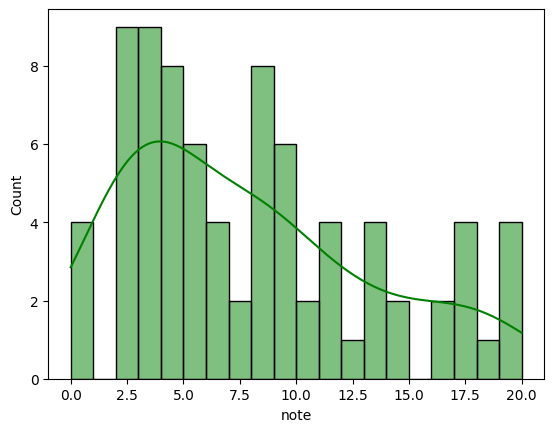

In [12]:
notes_sorted = notes.sort_values(by='note')
sns.histplot(notes_sorted['note'], kde=True, color='green', bins=20)

In [13]:
# pourcentage reussi
pourcentage_reussi = (notes['note'] >= 10).mean() * 100
print(pourcentage_reussi)

30.0


In [14]:
notes_filtered = notes[notes['pseudo'].isin(df['pseudo'])].reset_index(drop=True)
notes_filtered.head()

,pseudo,note
0,257,8
1,573,3
2,585,11
3,626,9
4,66,9


In [15]:
notes_filtered.shape

(78, 2)

# DataFrame df avec les features

In [16]:
#pd.set_option('display.max_rows', None)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pseudo,78.0,NaN,NaN,NaN,461.705128,272.570501,5.0,225.5,461.5,669.75,1000.0
nb_actions,78.0,NaN,NaN,NaN,356.038462,164.081342,34.0,251.25,352.0,418.75,1085.0
moyenne_nb_actions,78.0,NaN,NaN,NaN,12.741224,2.944129,5.583333,11.0,12.814991,14.232906,24.74359
nb_jours_avec_action,78.0,NaN,NaN,NaN,27.679487,10.660637,5.0,21.0,26.5,32.0,71.0
std_actions_par_jour,78.0,NaN,NaN,NaN,11.291848,3.171925,5.278889,9.586779,11.015844,12.478766,28.897931
...,...,...,...,...,...,...,...,...,...,...,...
evenement_Travail remis supprimé.,78.0,NaN,NaN,NaN,0.128205,0.406409,0.0,0.0,0.0,0.0,2.0
evenement_Utilisateur évalué,78.0,NaN,NaN,NaN,1.128205,0.610705,0.0,1.0,1.0,1.0,4.0
evenement_Visite guidée commencée,78.0,NaN,NaN,NaN,0.038462,0.193552,0.0,0.0,0.0,0.0,1.0
evenement_Visite guidée terminée,78.0,NaN,NaN,NaN,0.038462,0.193552,0.0,0.0,0.0,0.0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 66 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   pseudo                                                      78 non-null     int64  
 1   nb_actions                                                  78 non-null     int64  
 2   moyenne_nb_actions                                          78 non-null     float64
 3   nb_jours_avec_action                                        78 non-null     int64  
 4   std_actions_par_jour                                        78 non-null     float64
 5   tempsdiff_jours                                             78 non-null     int64  
 6   constance_activite                                          78 non-null     float64
 7   activite_moyenne_par_jour_min                               78 non-null     float64
 8   po

In [18]:
df.shape

(78, 66)

In [19]:
df.dtypes.value_counts()

int64      54
float64     9
object      3
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

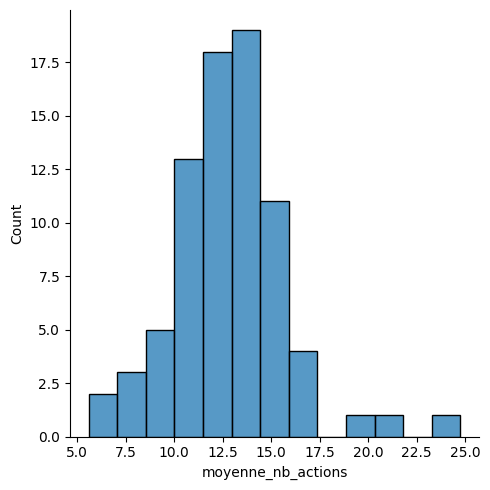

<Figure size 640x480 with 0 Axes>

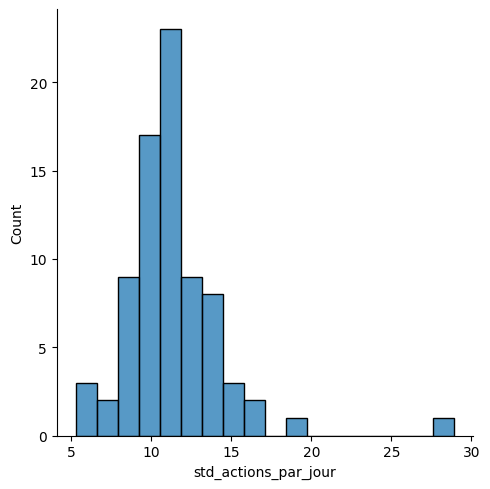

<Figure size 640x480 with 0 Axes>

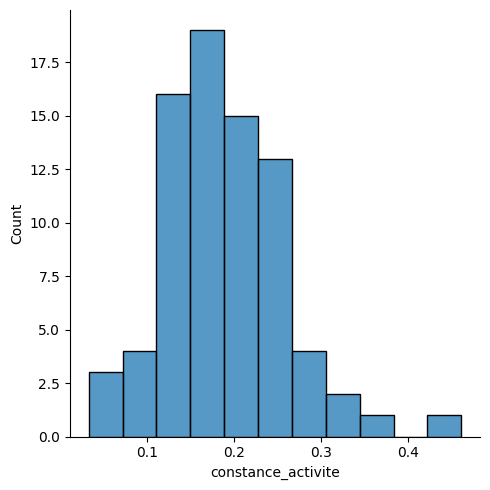

<Figure size 640x480 with 0 Axes>

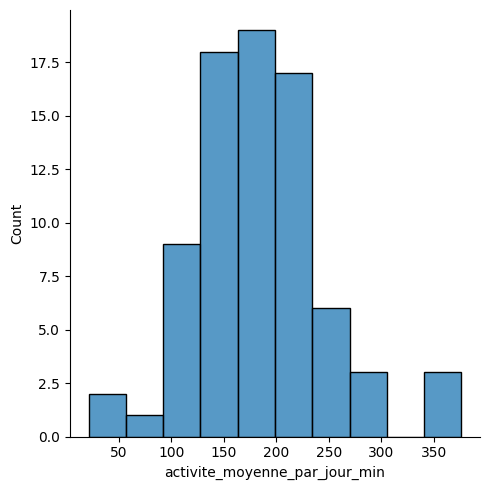

<Figure size 640x480 with 0 Axes>

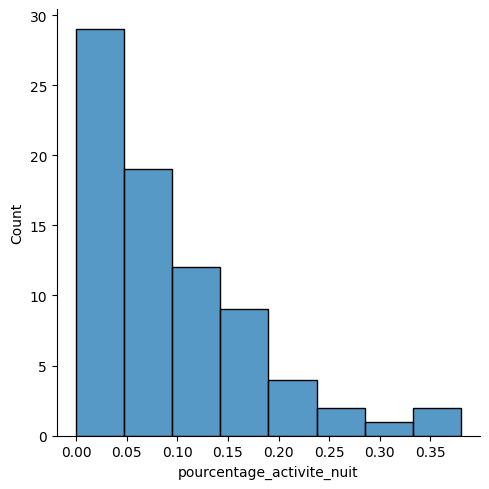

<Figure size 640x480 with 0 Axes>

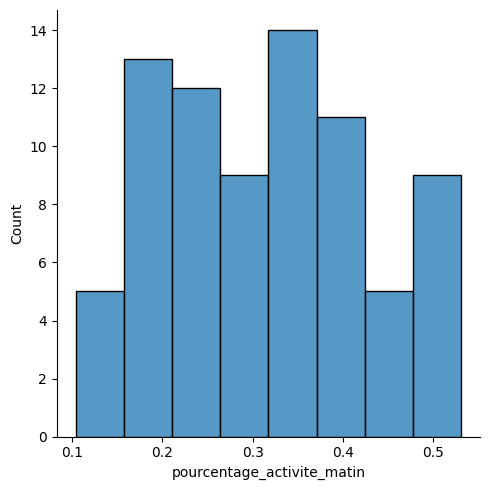

<Figure size 640x480 with 0 Axes>

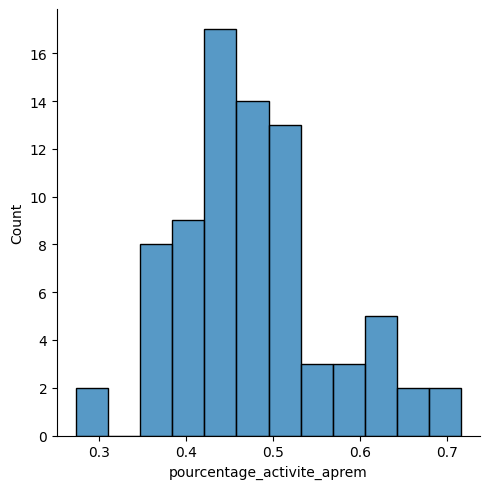

<Figure size 640x480 with 0 Axes>

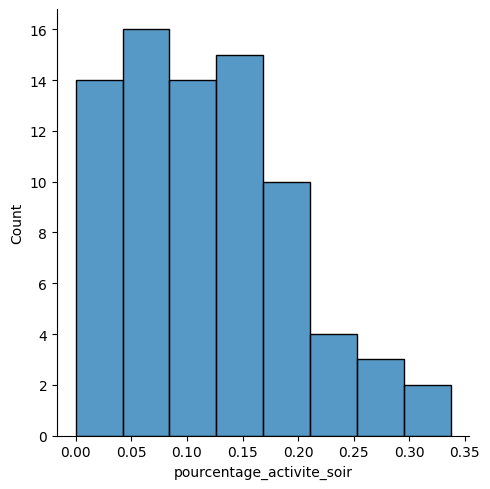

<Figure size 640x480 with 0 Axes>

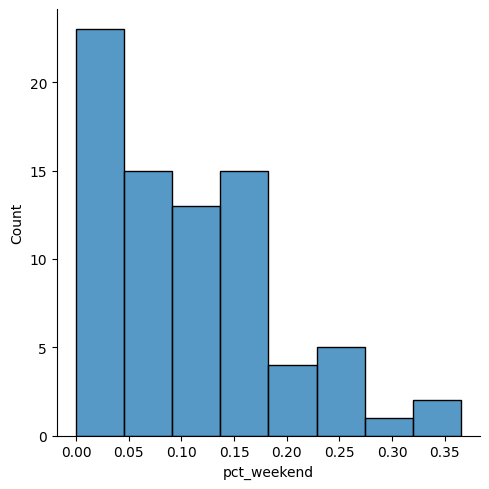

In [20]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_17560\2248101568.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

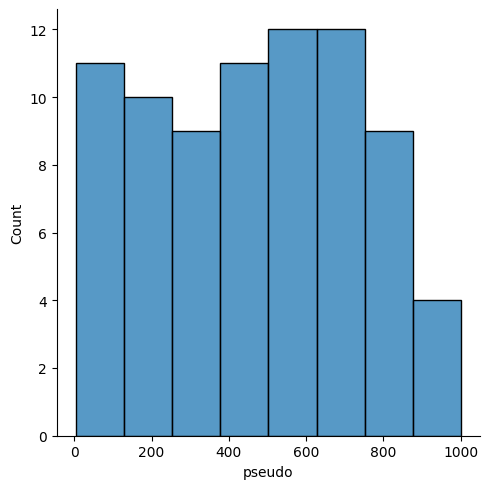

<Figure size 640x480 with 0 Axes>

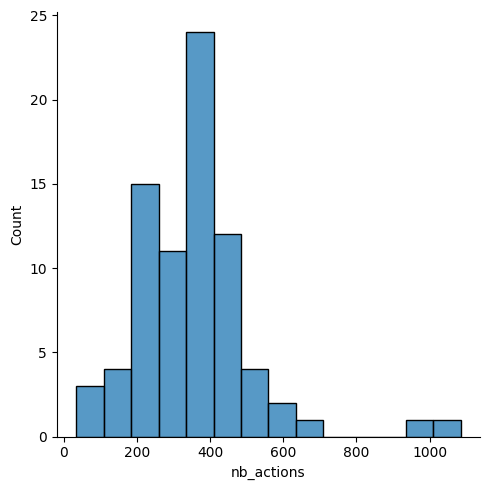

<Figure size 640x480 with 0 Axes>

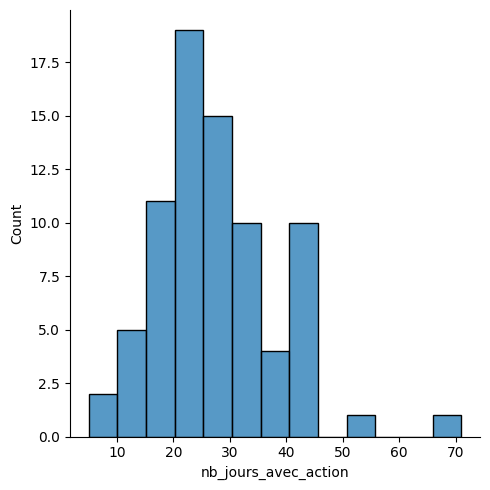

<Figure size 640x480 with 0 Axes>

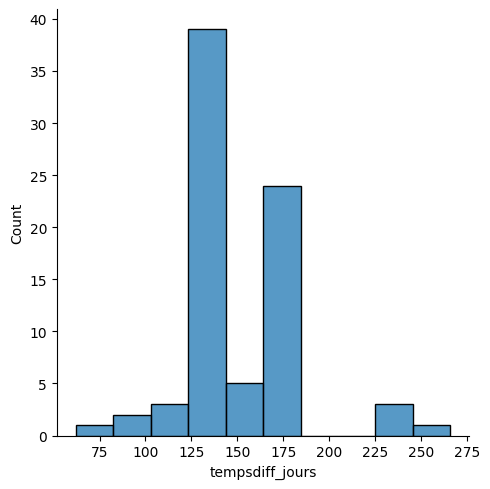

<Figure size 640x480 with 0 Axes>

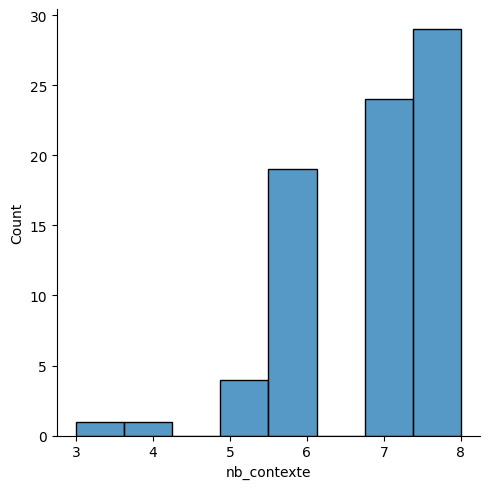

<Figure size 640x480 with 0 Axes>

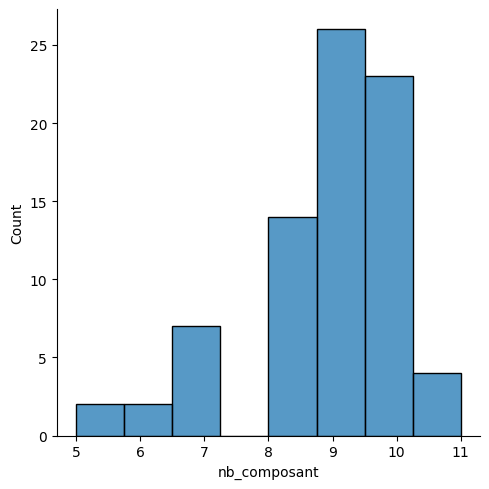

<Figure size 640x480 with 0 Axes>

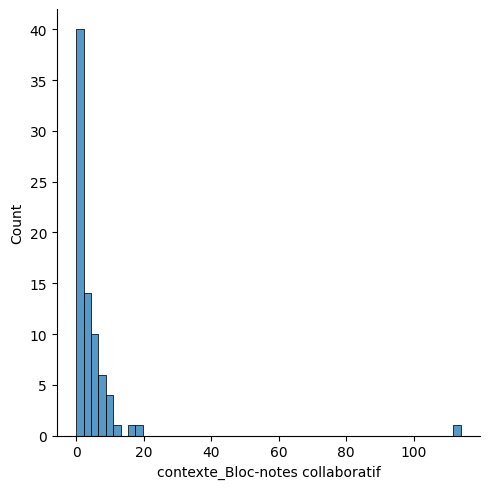

<Figure size 640x480 with 0 Axes>

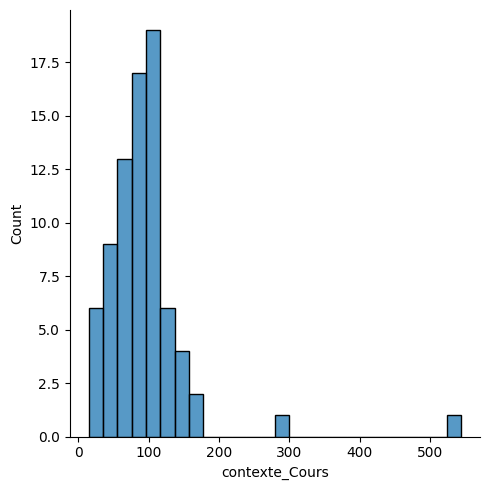

<Figure size 640x480 with 0 Axes>

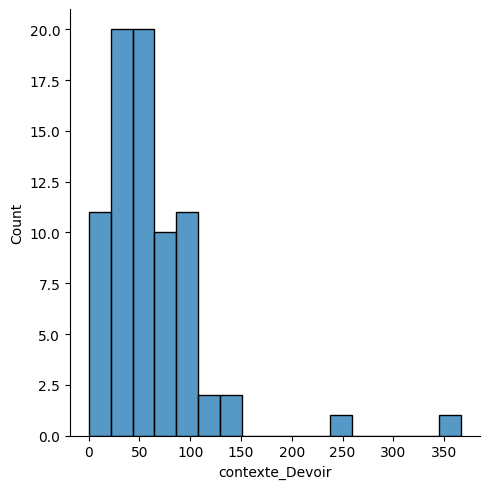

<Figure size 640x480 with 0 Axes>

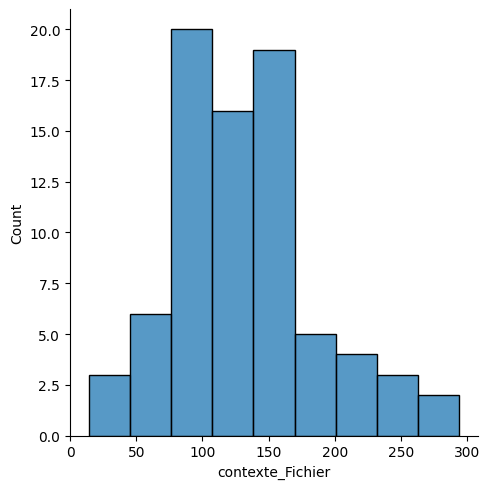

<Figure size 640x480 with 0 Axes>

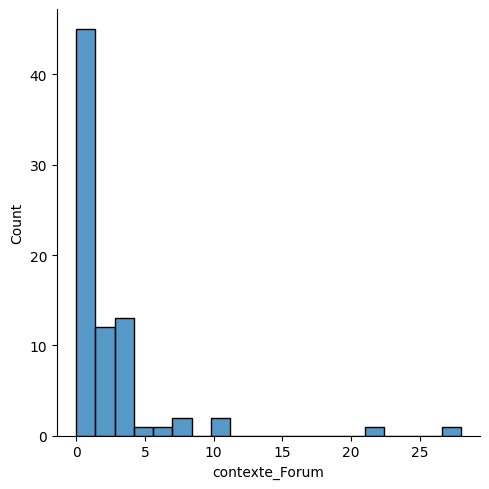

<Figure size 640x480 with 0 Axes>

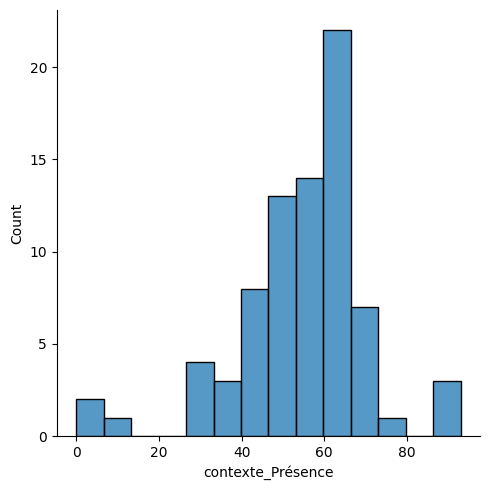

<Figure size 640x480 with 0 Axes>

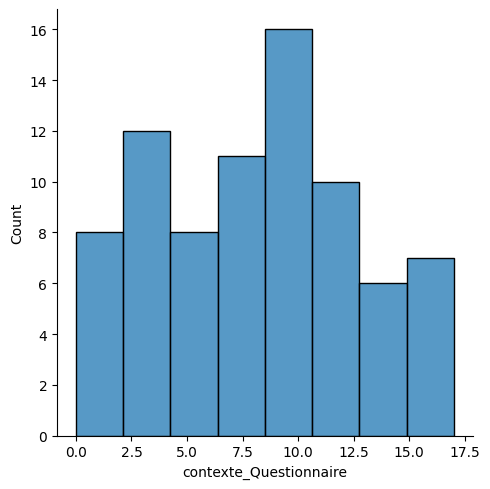

<Figure size 640x480 with 0 Axes>

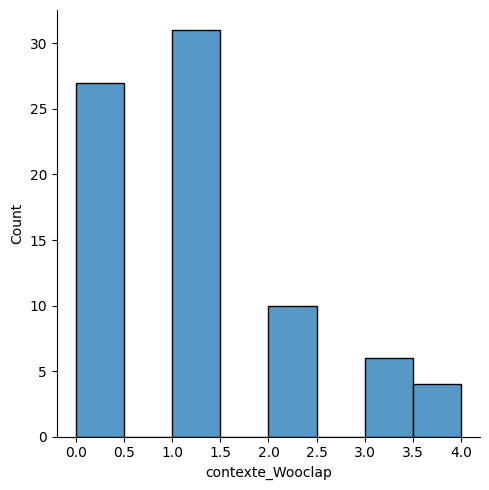

<Figure size 640x480 with 0 Axes>

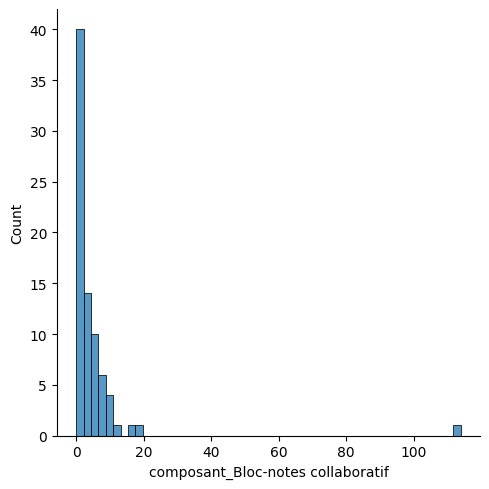

<Figure size 640x480 with 0 Axes>

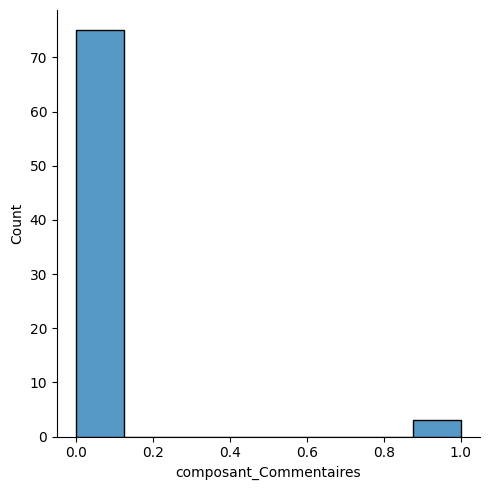

<Figure size 640x480 with 0 Axes>

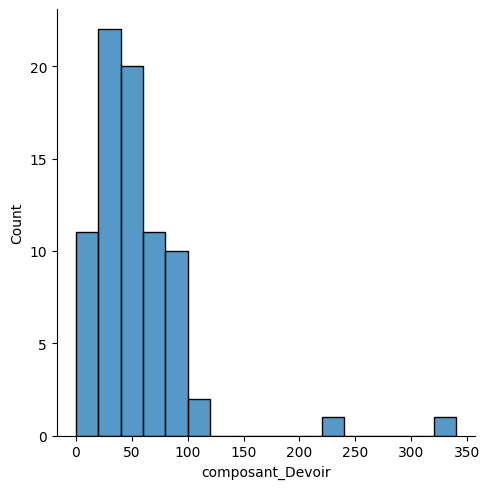

<Figure size 640x480 with 0 Axes>

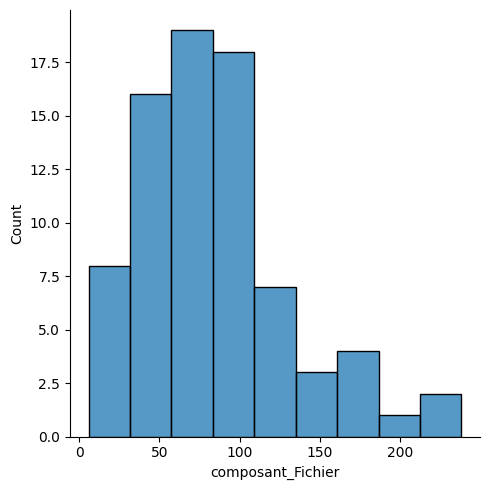

<Figure size 640x480 with 0 Axes>

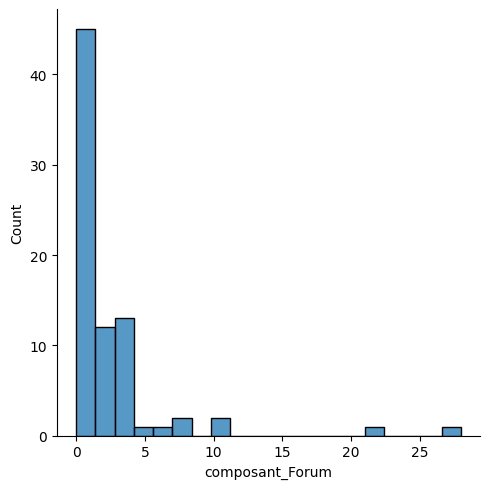

<Figure size 640x480 with 0 Axes>

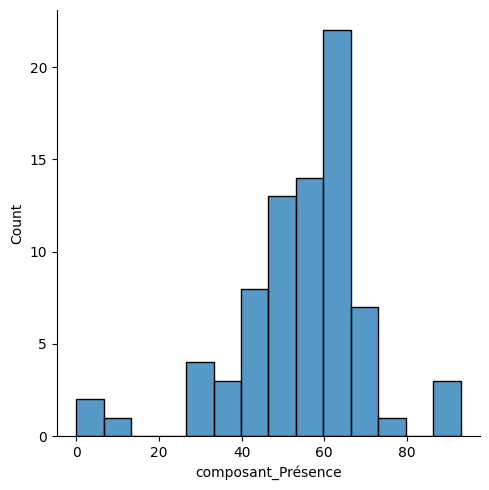

<Figure size 640x480 with 0 Axes>

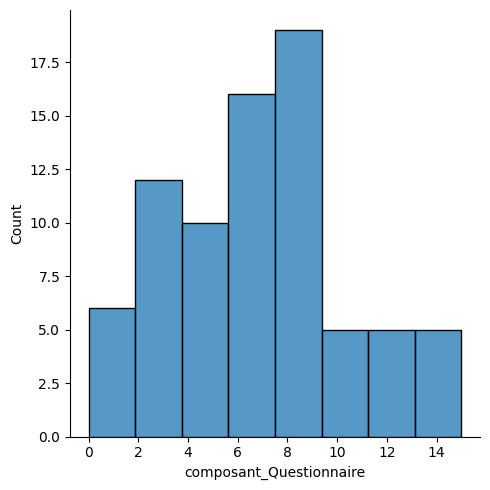

<Figure size 640x480 with 0 Axes>

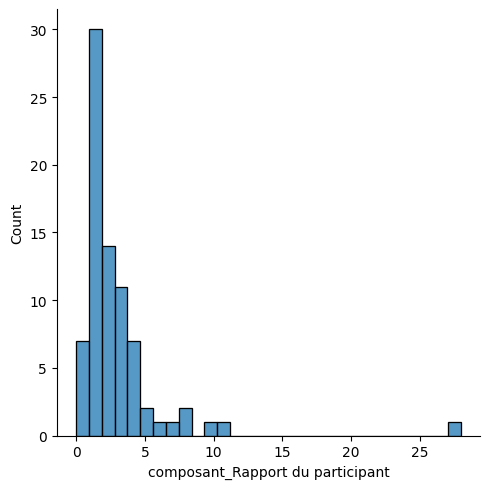

<Figure size 640x480 with 0 Axes>

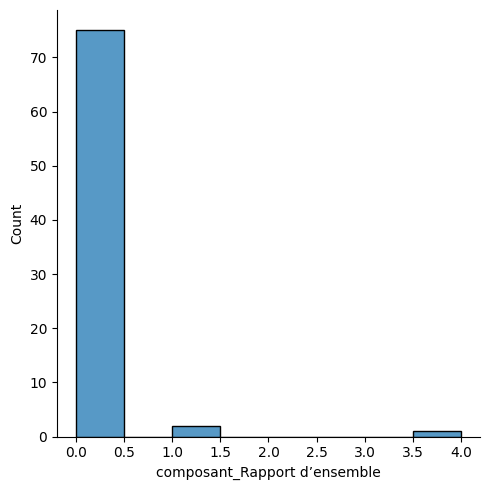

<Figure size 640x480 with 0 Axes>

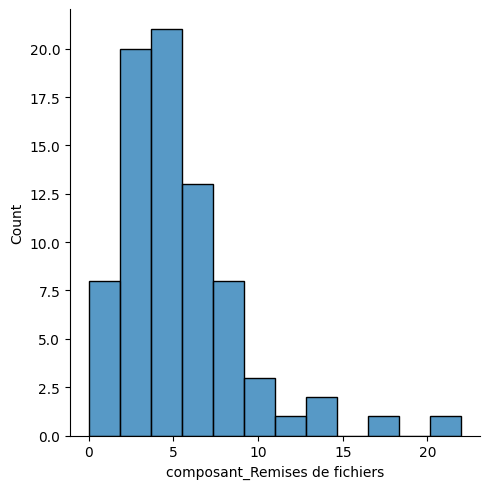

<Figure size 640x480 with 0 Axes>

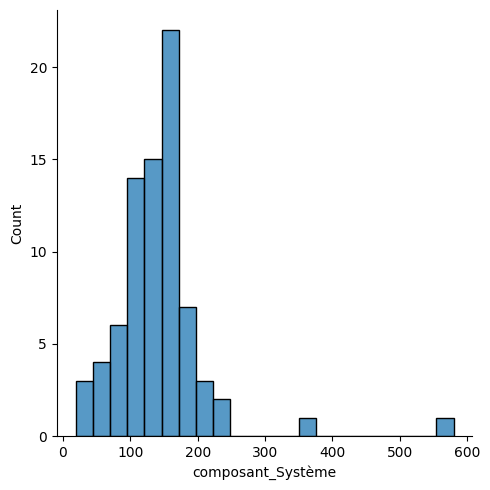

<Figure size 640x480 with 0 Axes>

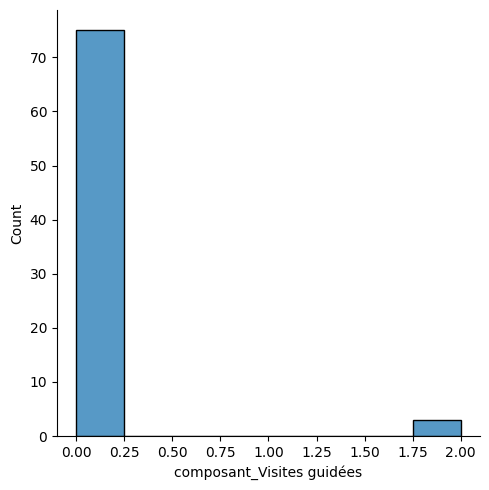

<Figure size 640x480 with 0 Axes>

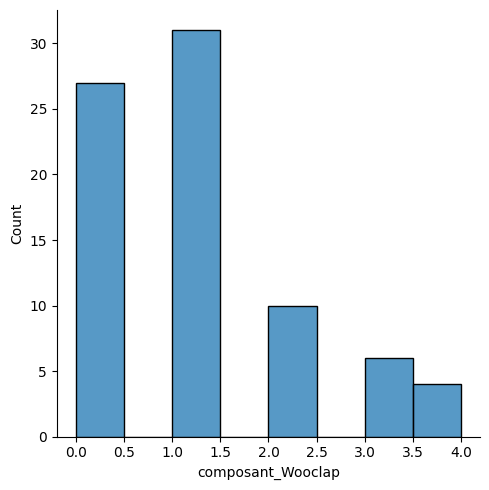

<Figure size 640x480 with 0 Axes>

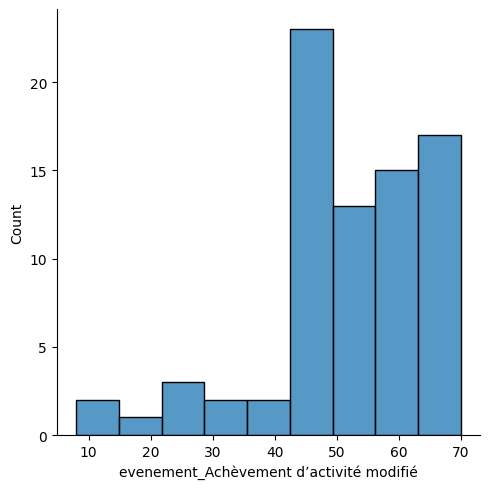

<Figure size 640x480 with 0 Axes>

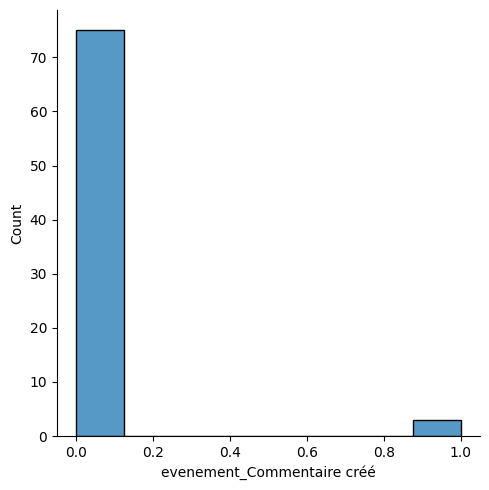

<Figure size 640x480 with 0 Axes>

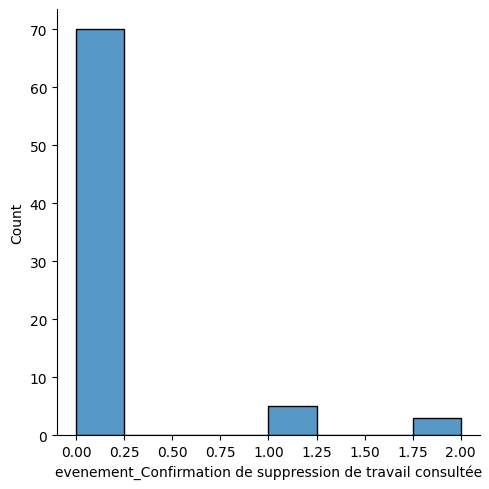

<Figure size 640x480 with 0 Axes>

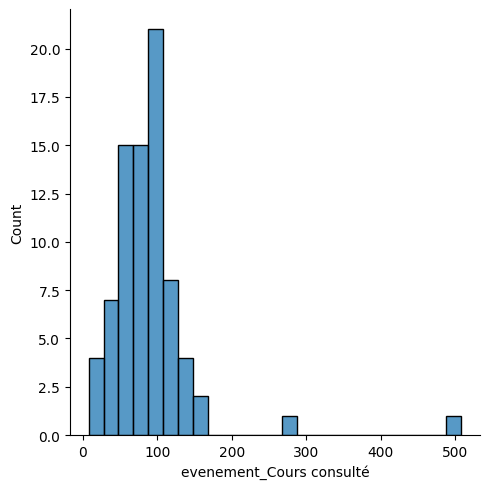

<Figure size 640x480 with 0 Axes>

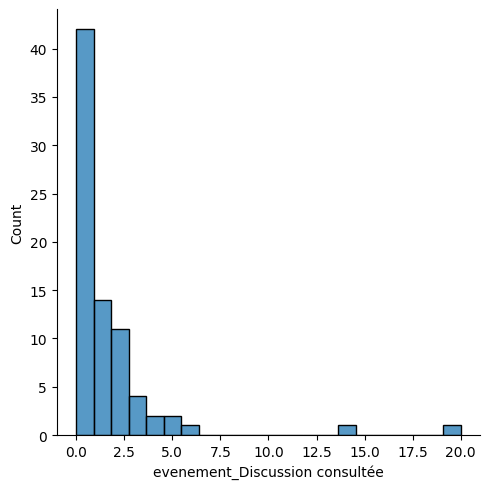

<Figure size 640x480 with 0 Axes>

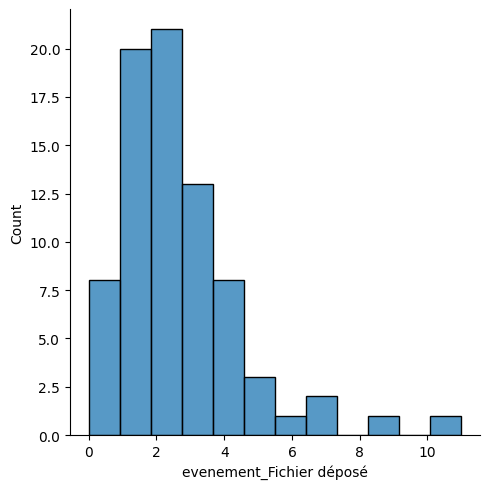

<Figure size 640x480 with 0 Axes>

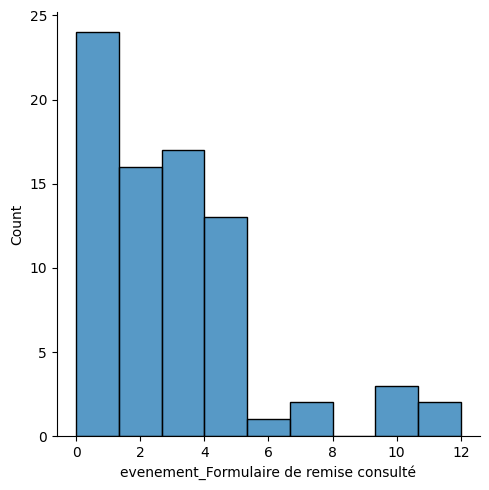

<Figure size 640x480 with 0 Axes>

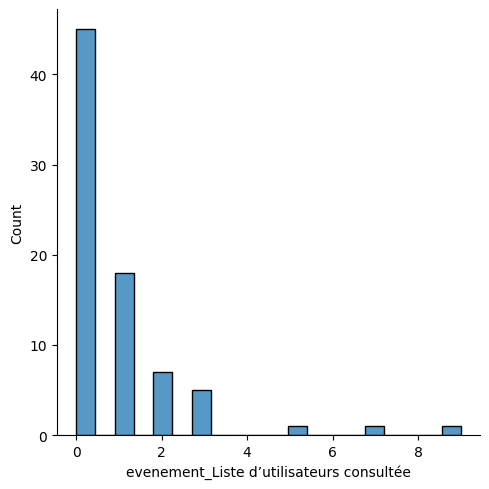

<Figure size 640x480 with 0 Axes>

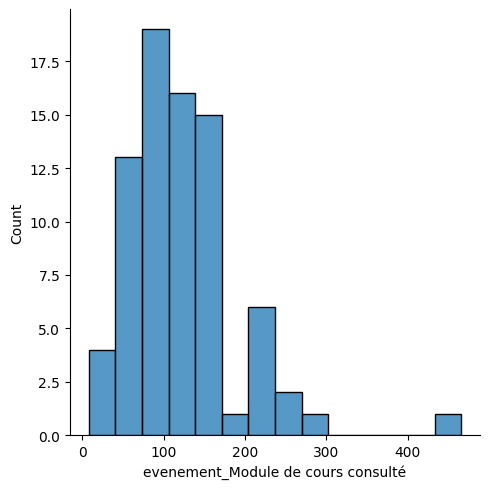

<Figure size 640x480 with 0 Axes>

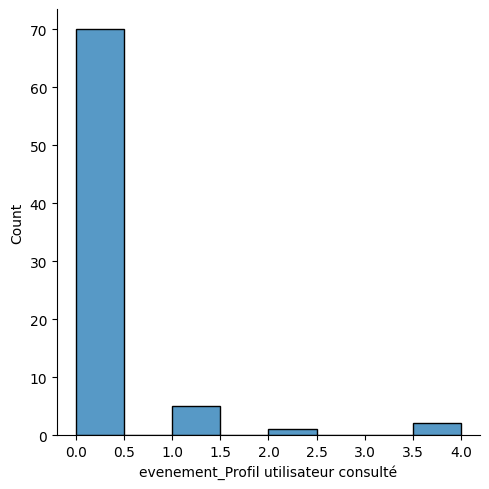

<Figure size 640x480 with 0 Axes>

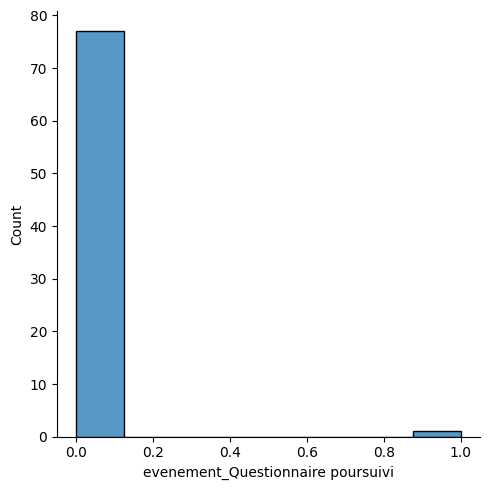

<Figure size 640x480 with 0 Axes>

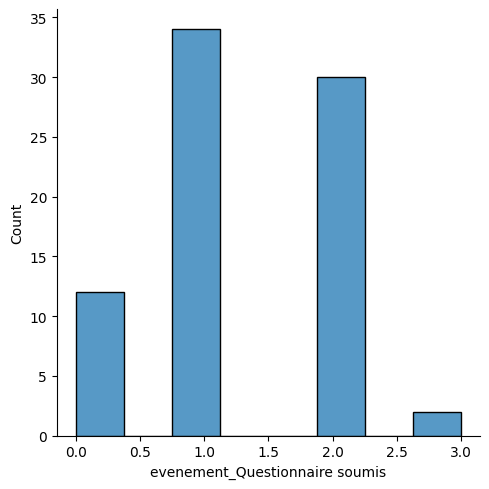

<Figure size 640x480 with 0 Axes>

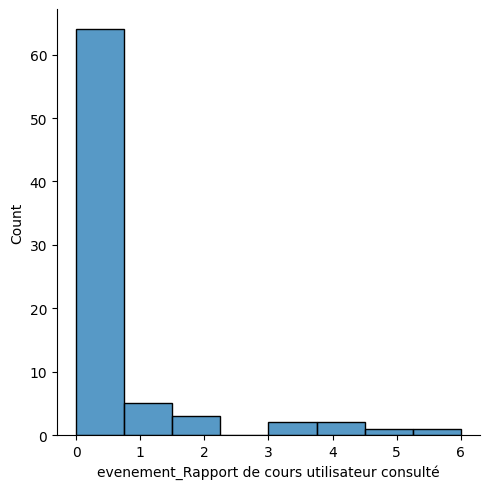

<Figure size 640x480 with 0 Axes>

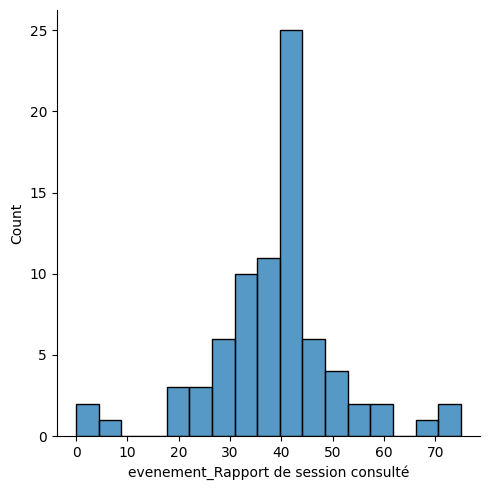

<Figure size 640x480 with 0 Axes>

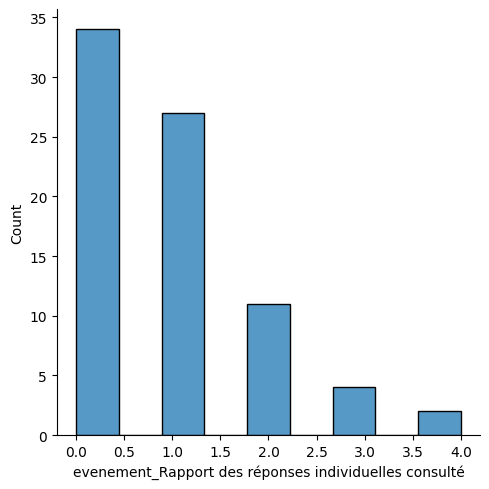

<Figure size 640x480 with 0 Axes>

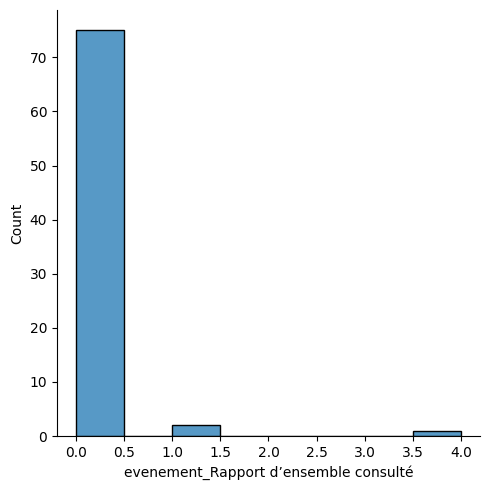

<Figure size 640x480 with 0 Axes>

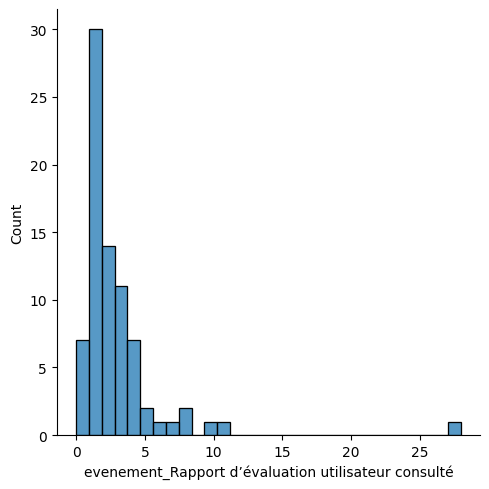

<Figure size 640x480 with 0 Axes>

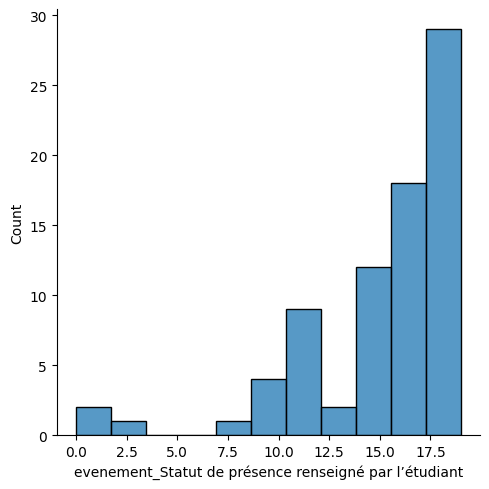

<Figure size 640x480 with 0 Axes>

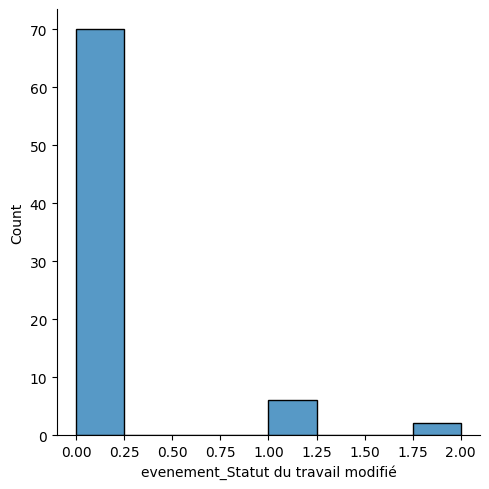

<Figure size 640x480 with 0 Axes>

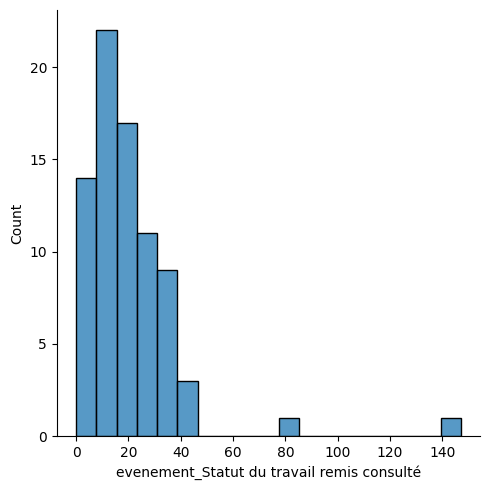

<Figure size 640x480 with 0 Axes>

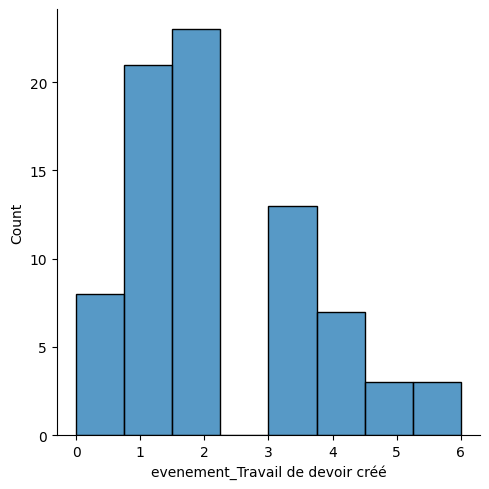

<Figure size 640x480 with 0 Axes>

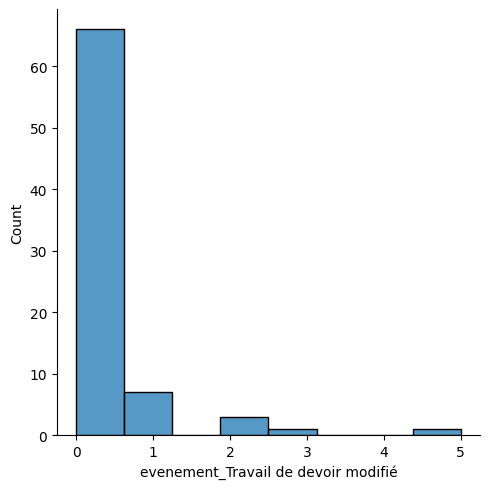

<Figure size 640x480 with 0 Axes>

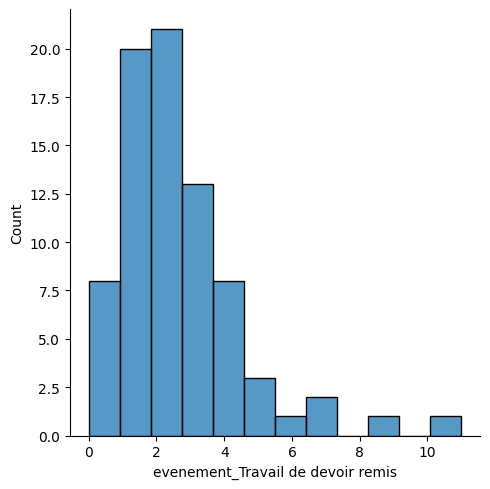

<Figure size 640x480 with 0 Axes>

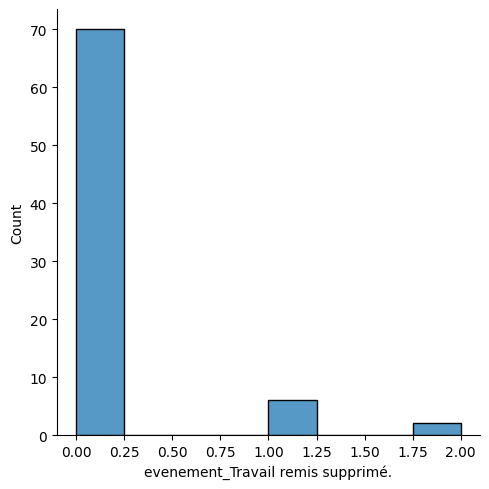

<Figure size 640x480 with 0 Axes>

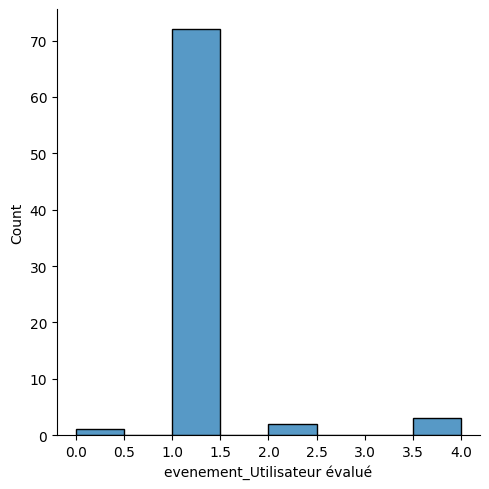

<Figure size 640x480 with 0 Axes>

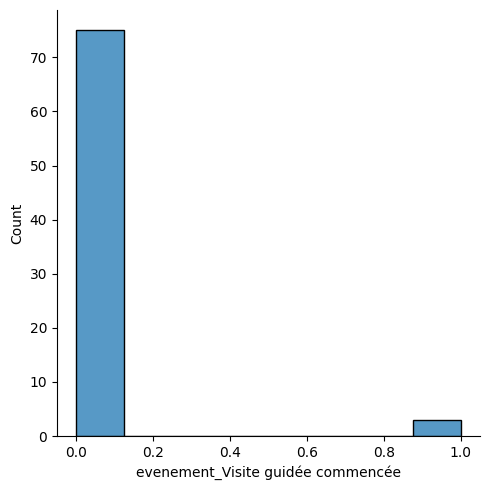

<Figure size 640x480 with 0 Axes>

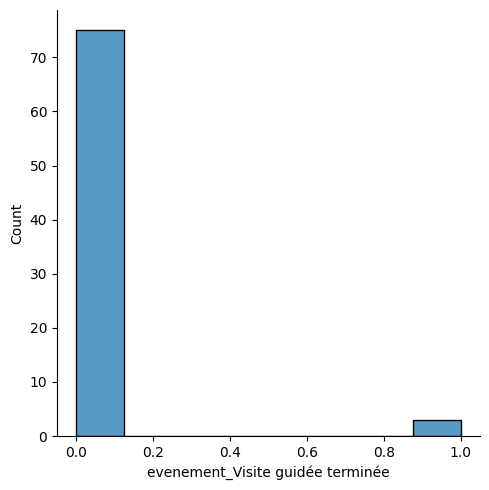

In [21]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.displot(df[col])

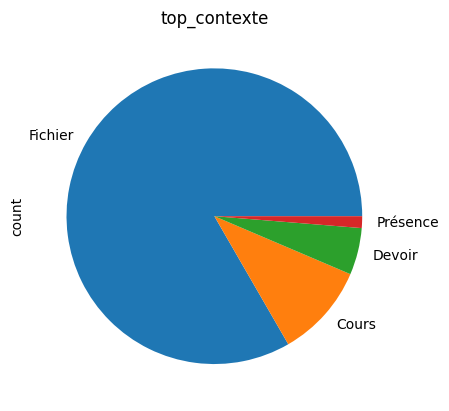

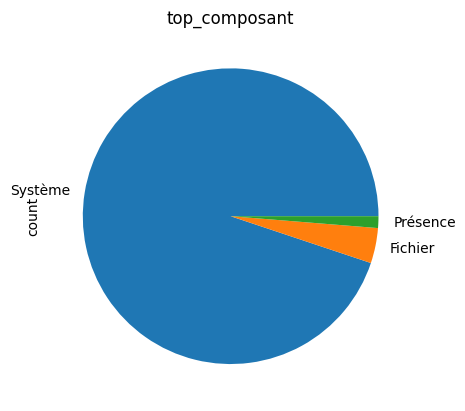

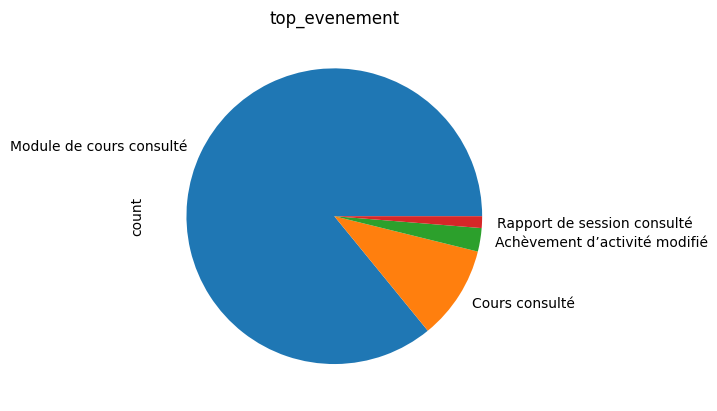

In [22]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_17560\474872097.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


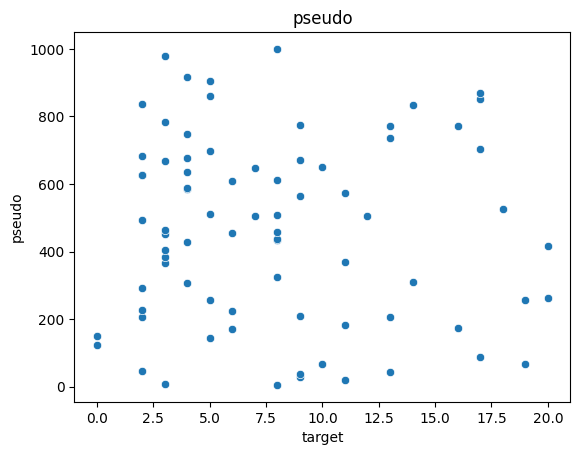

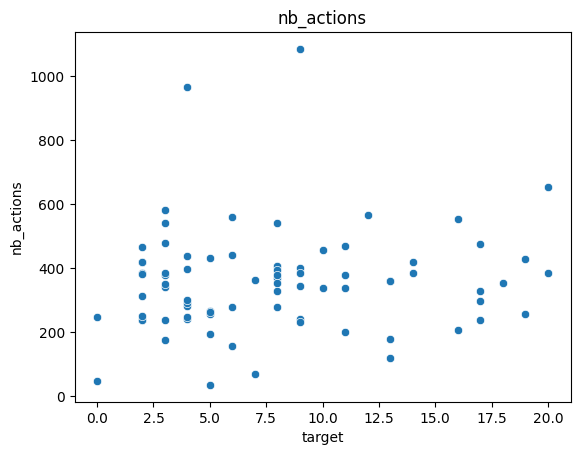

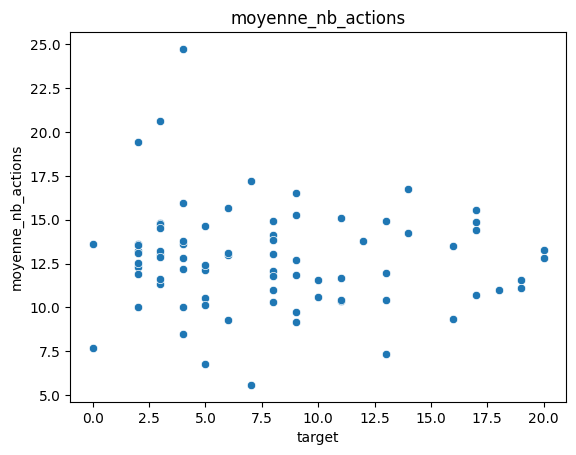

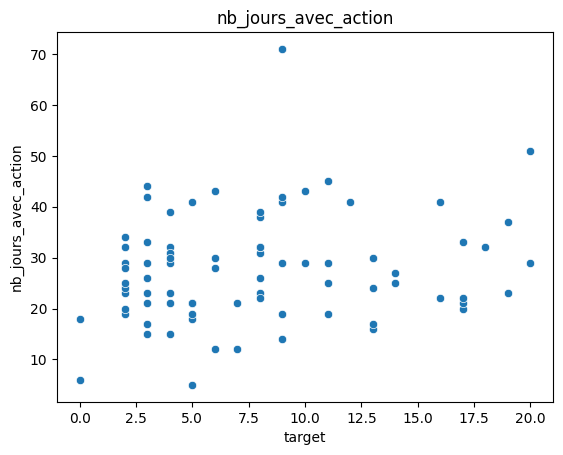

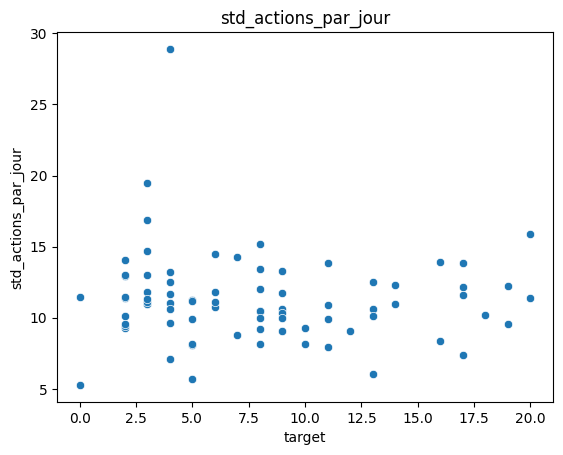

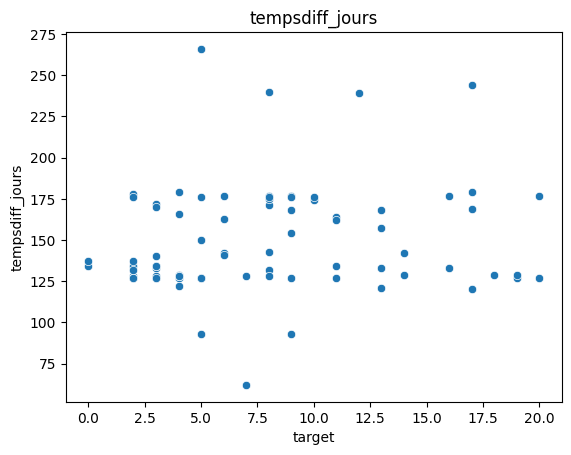

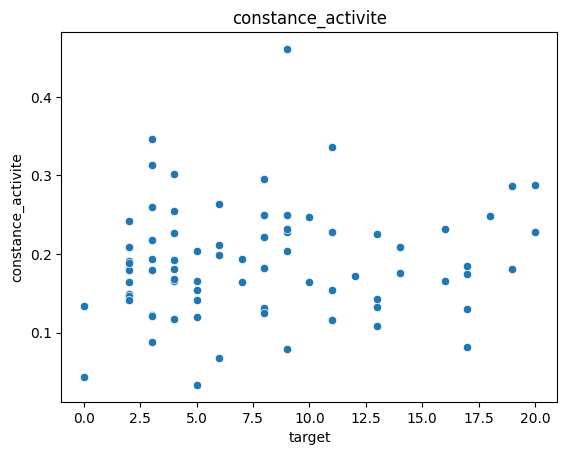

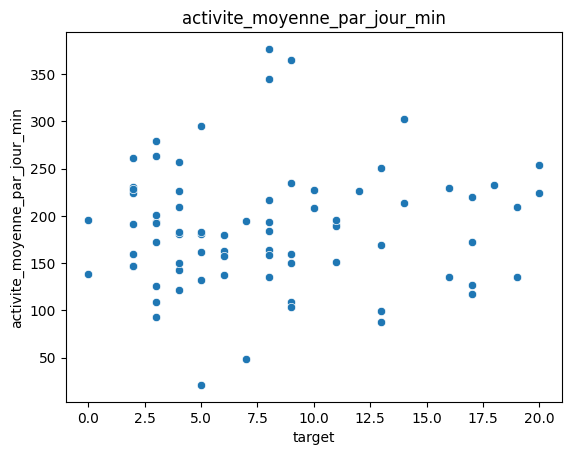

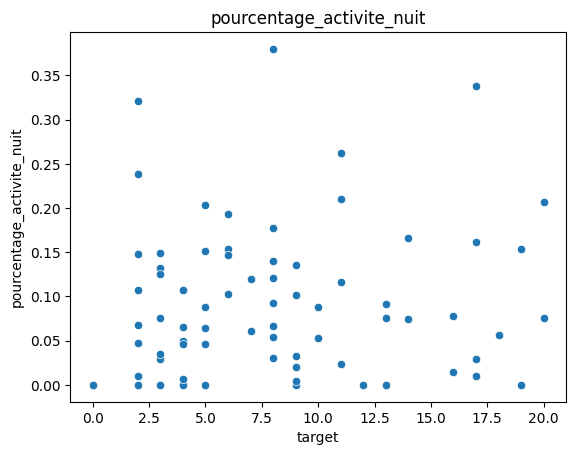

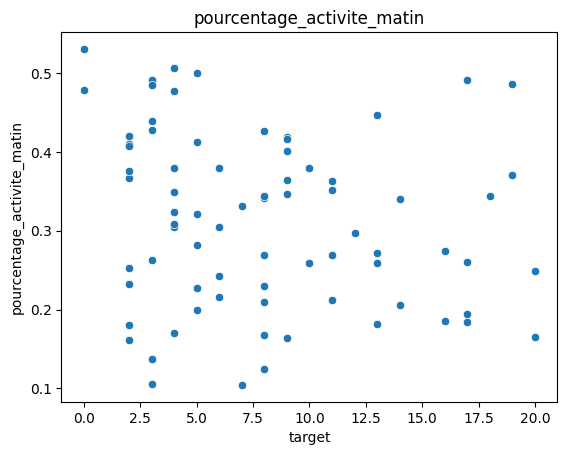

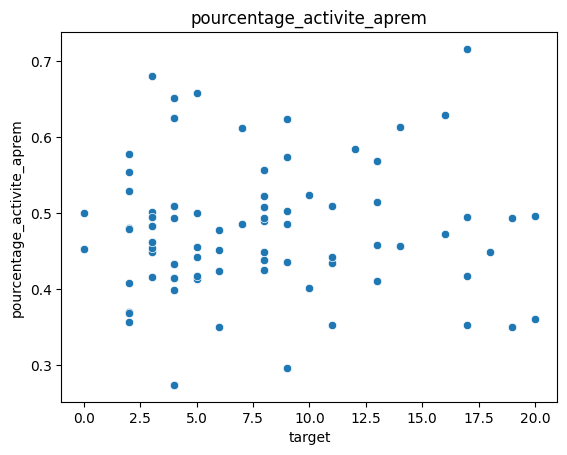

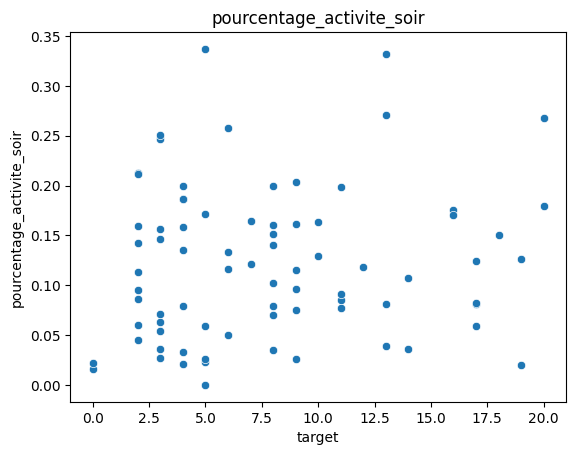

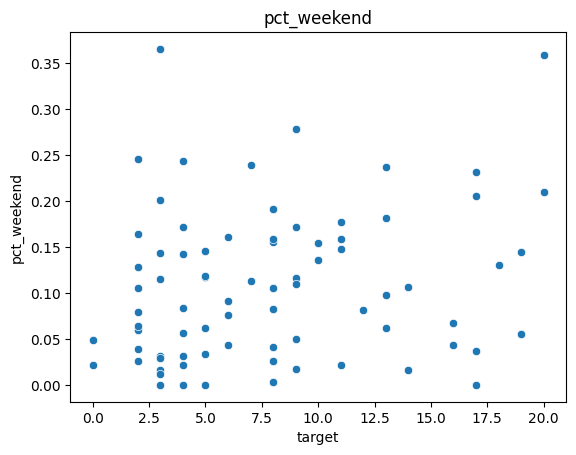

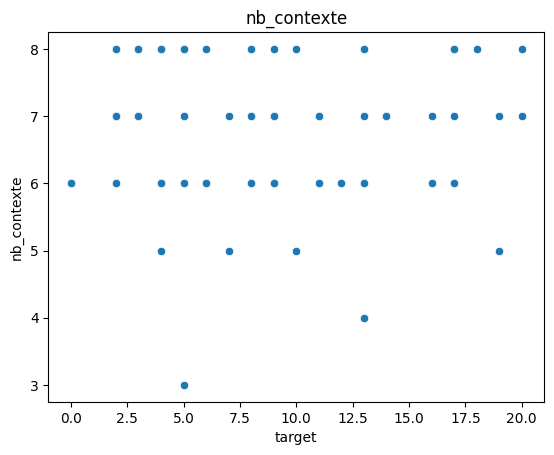

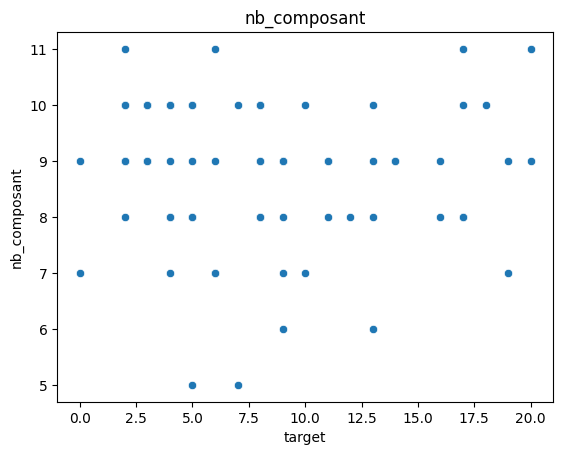

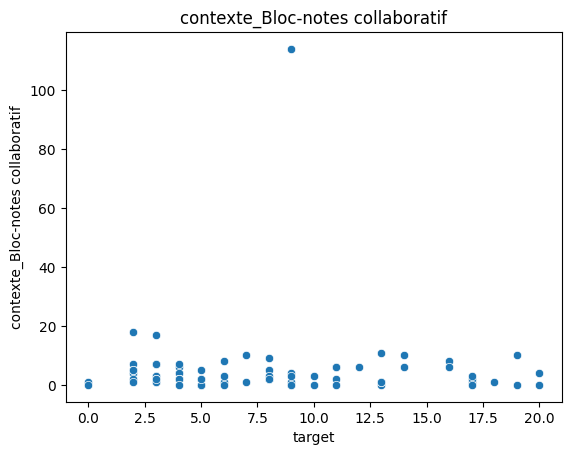

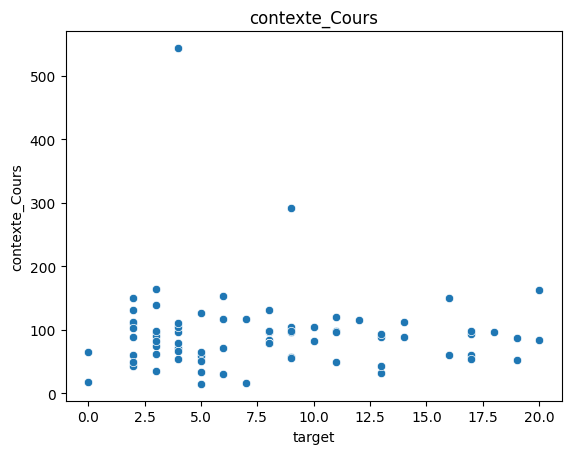

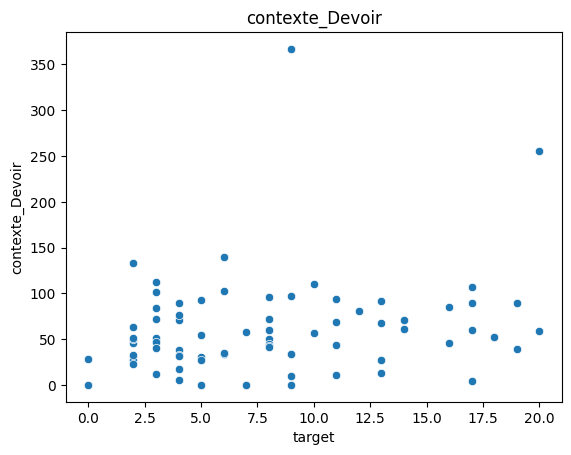

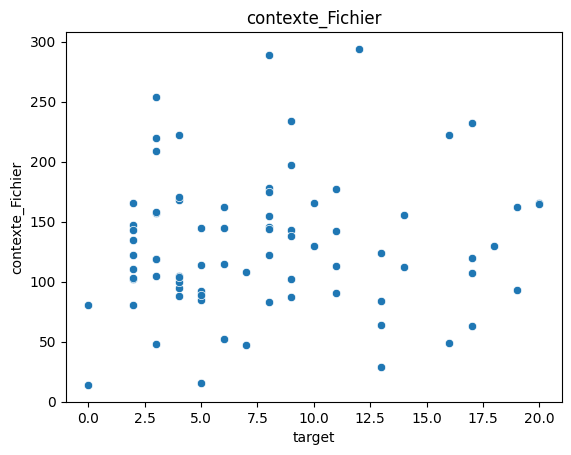

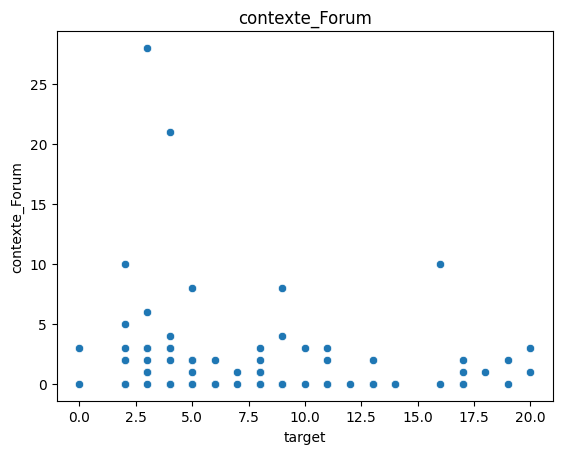

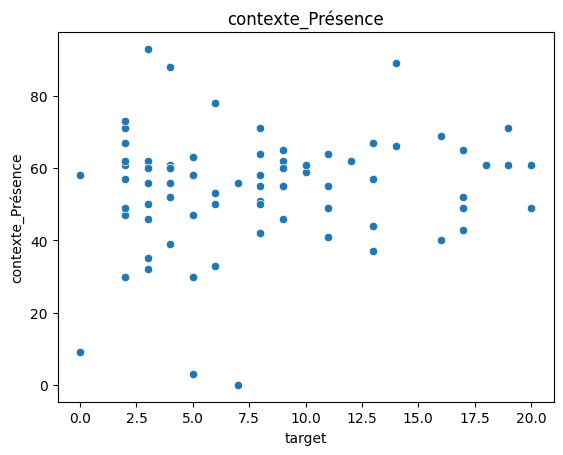

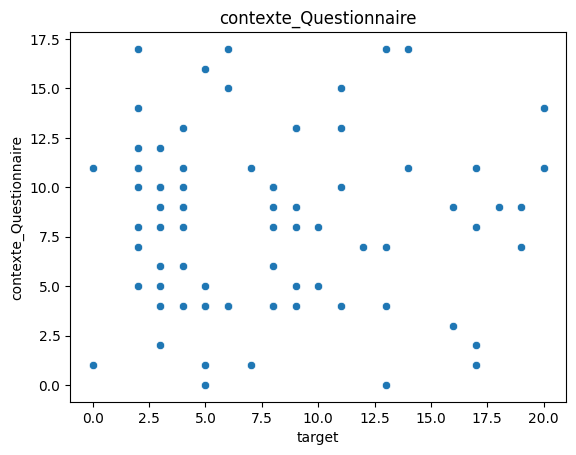

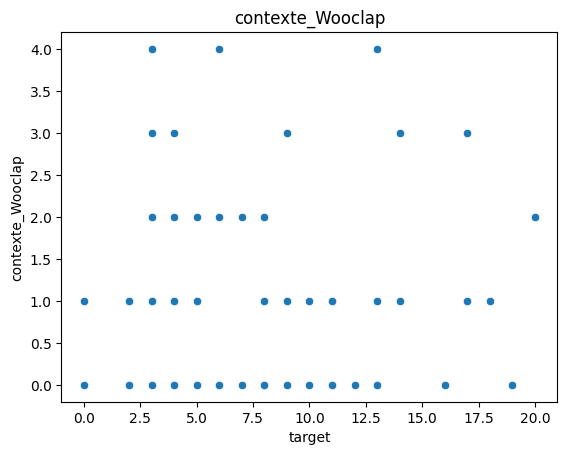

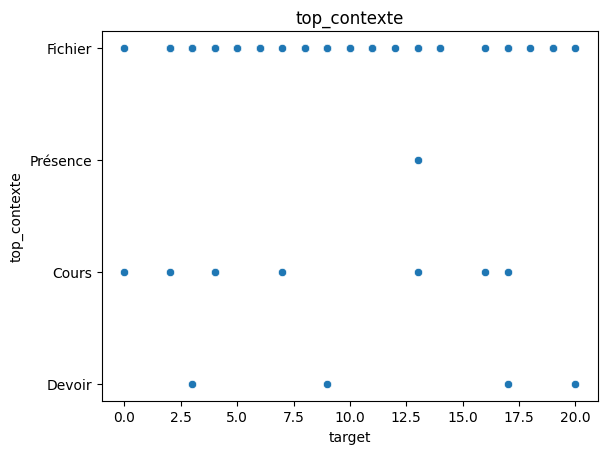

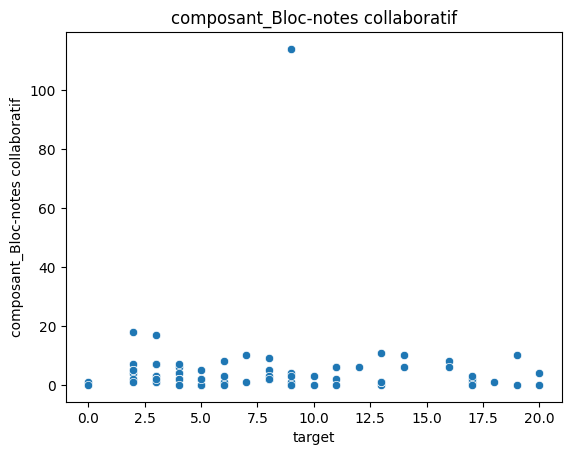

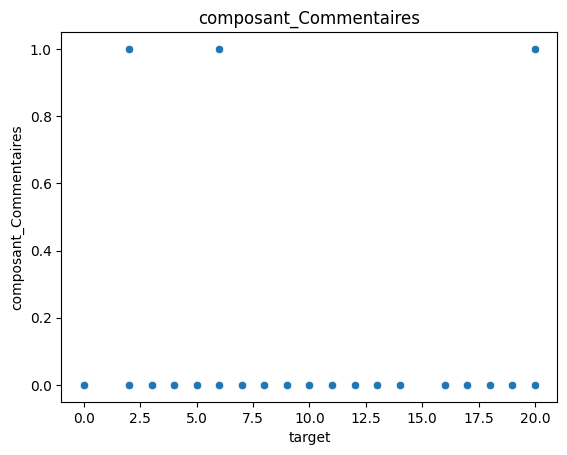

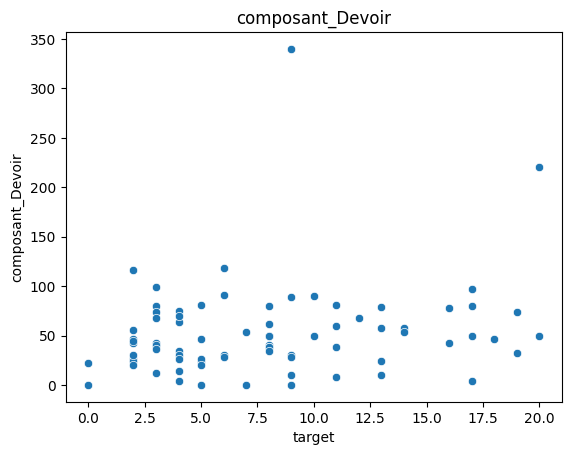

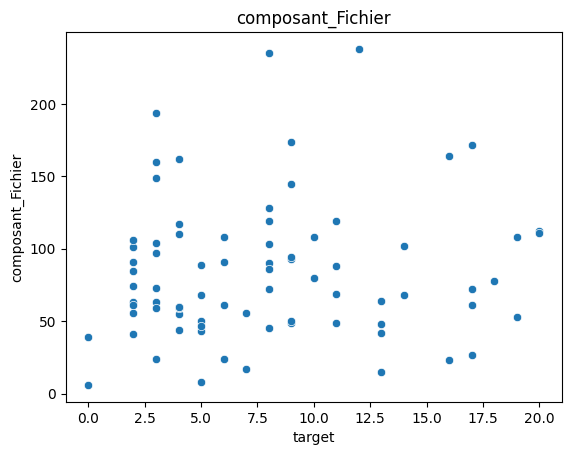

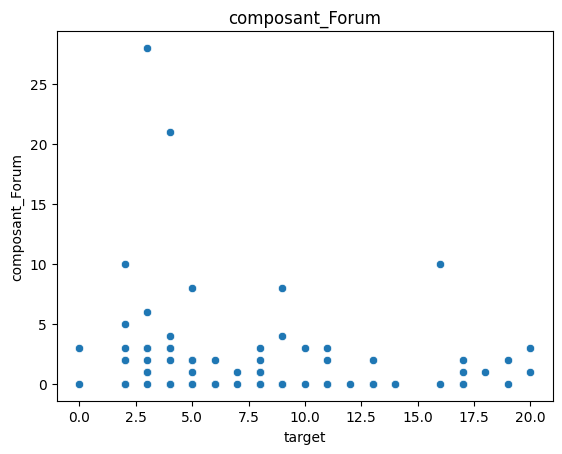

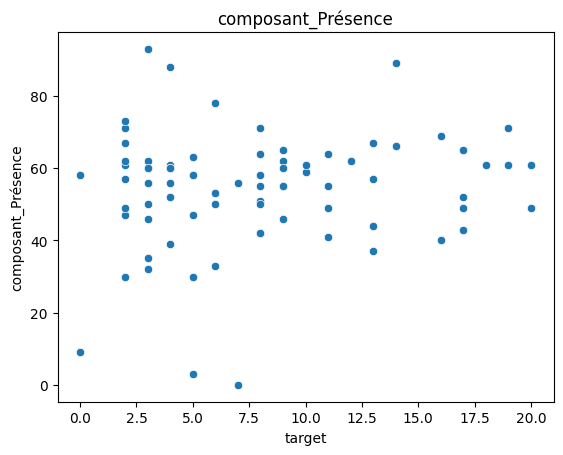

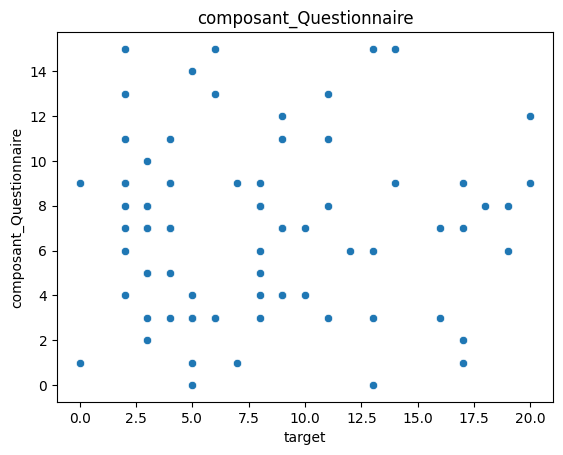

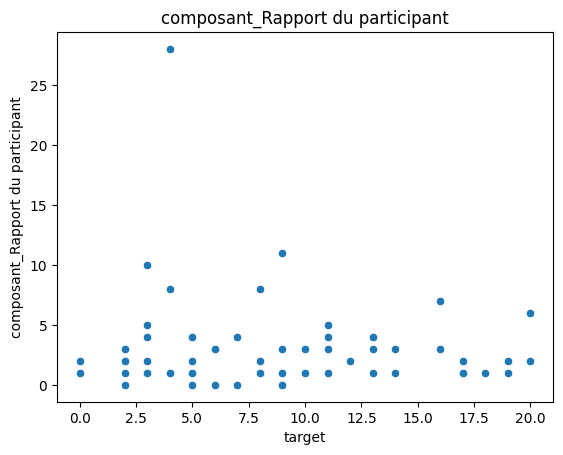

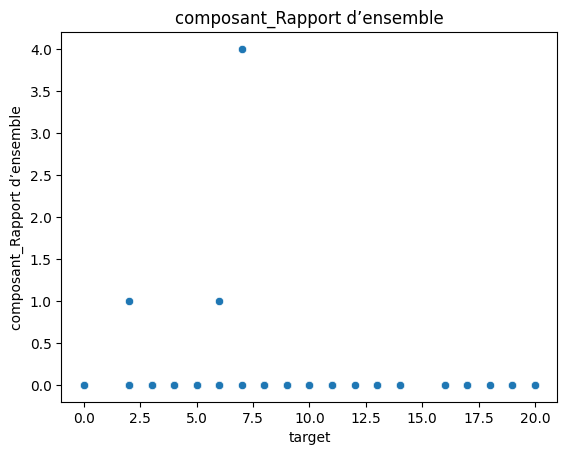

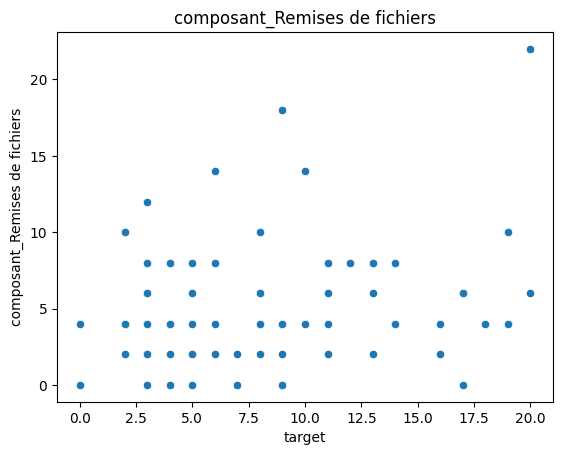

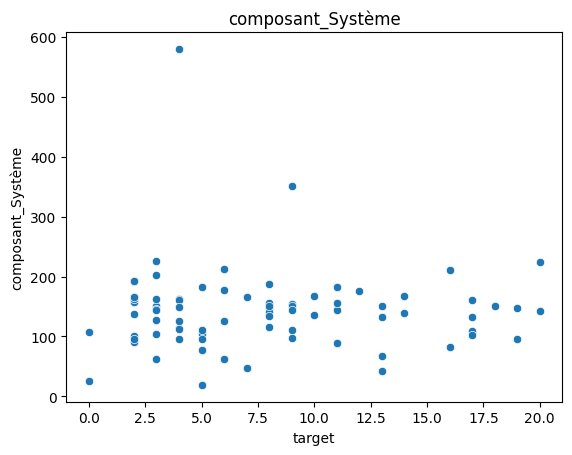

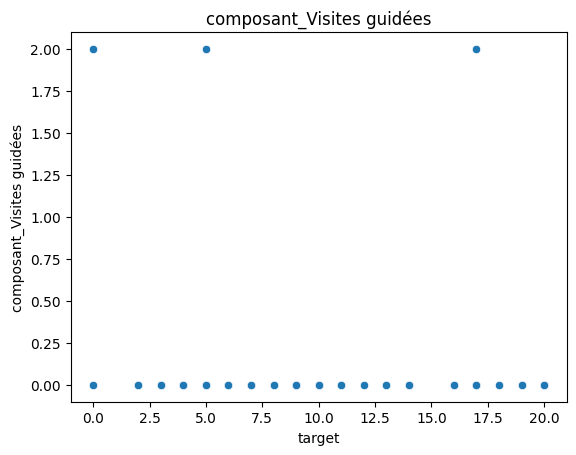

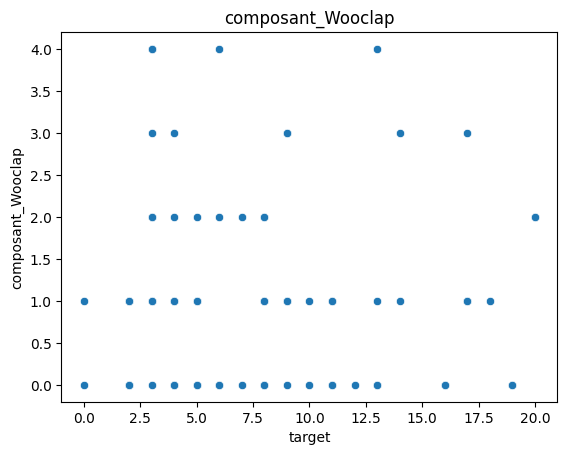

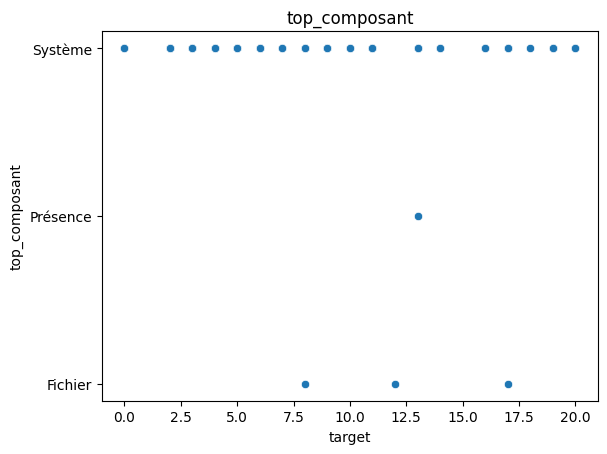

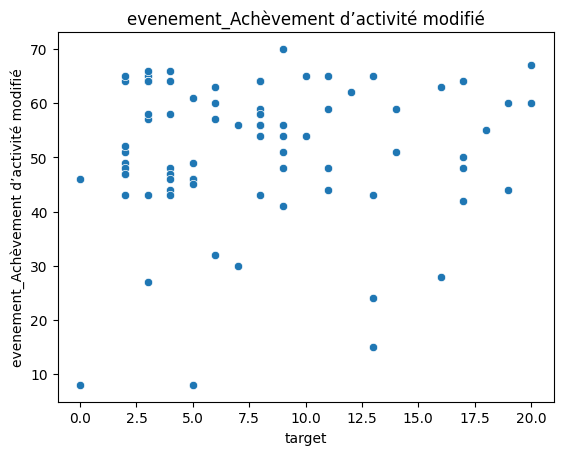

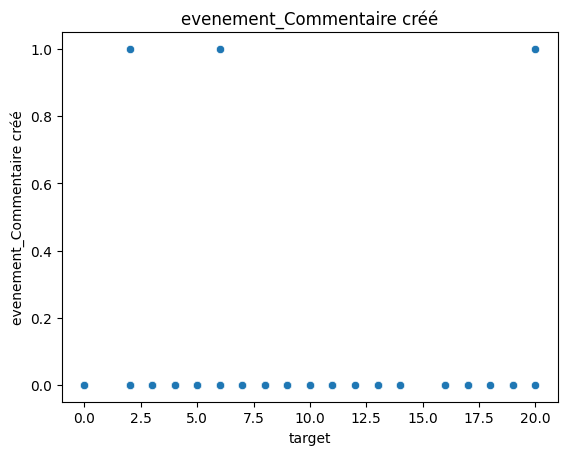

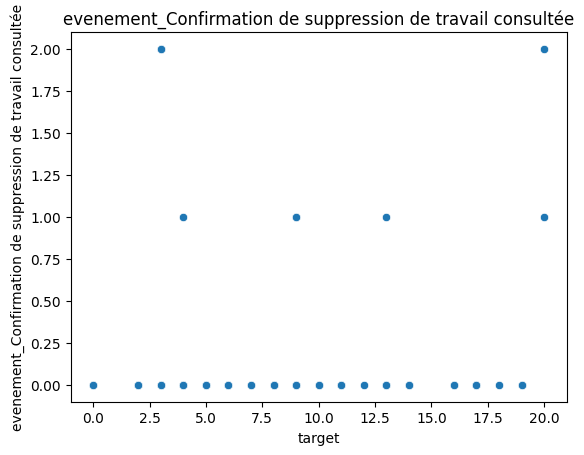

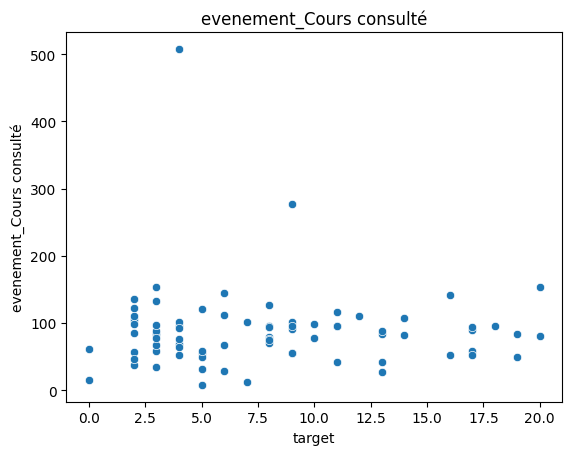

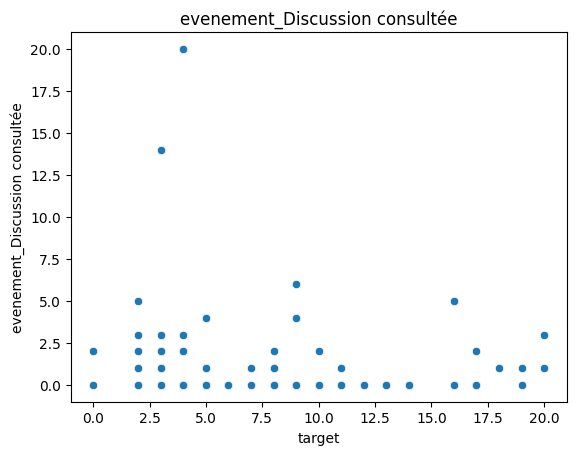

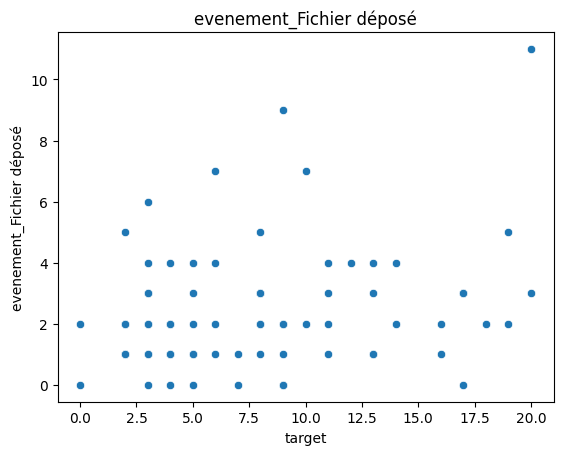

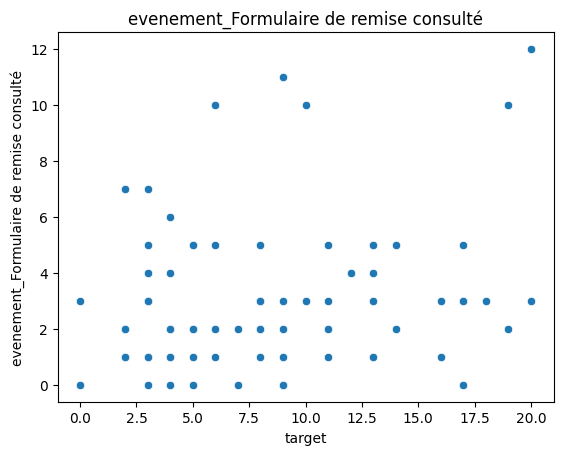

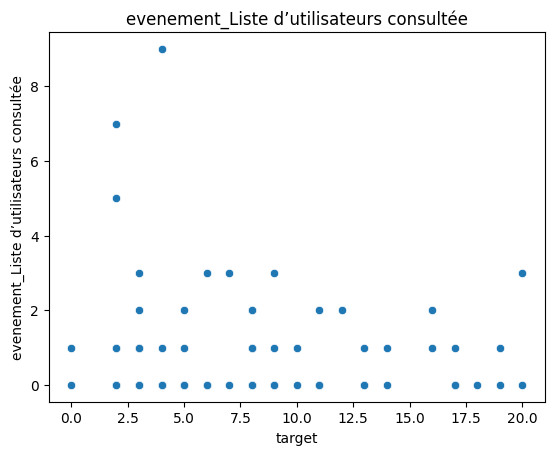

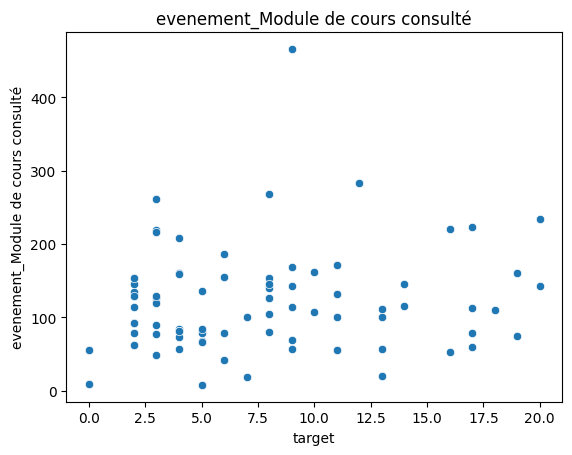

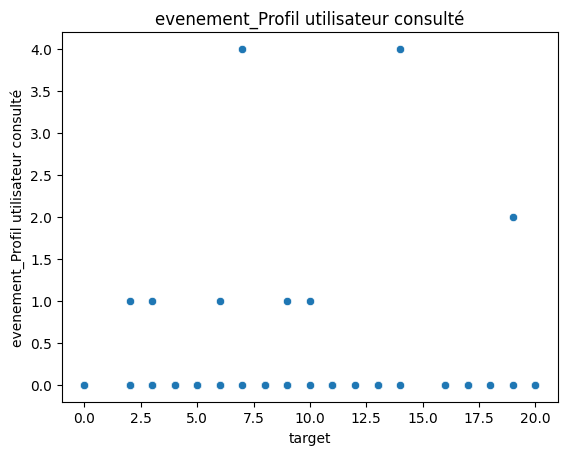

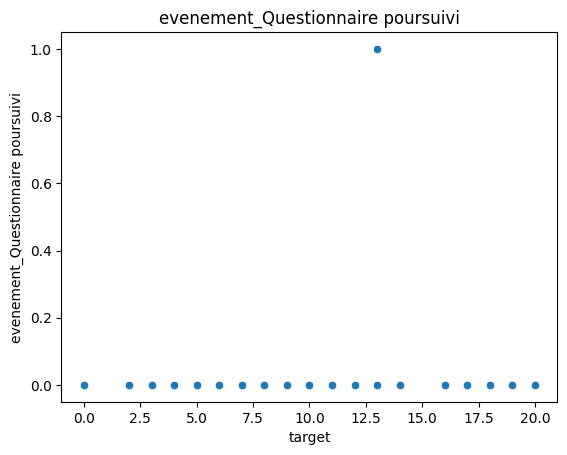

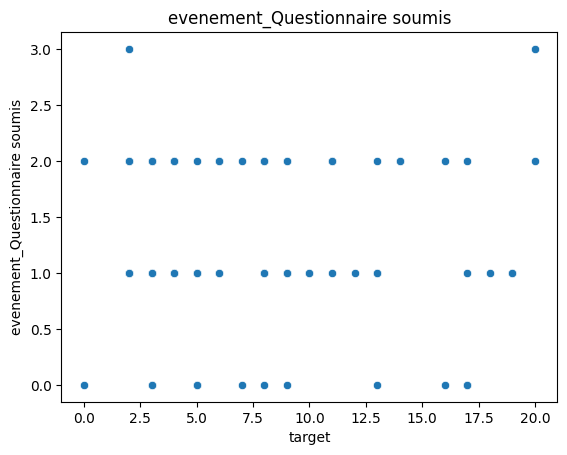

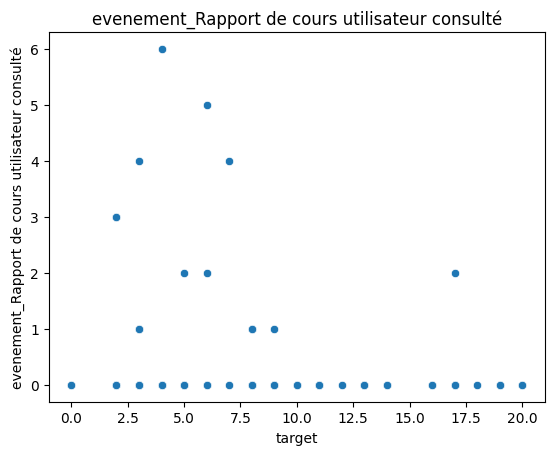

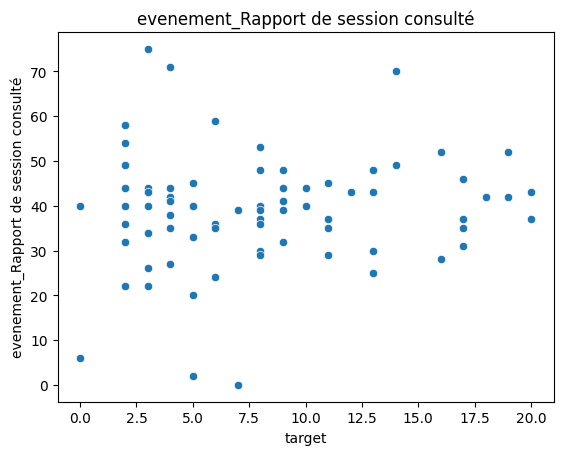

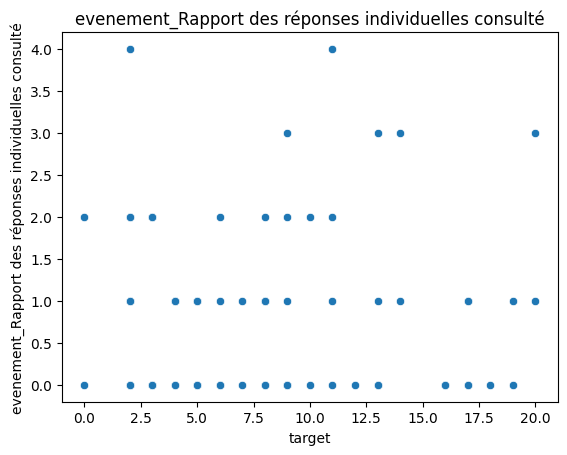

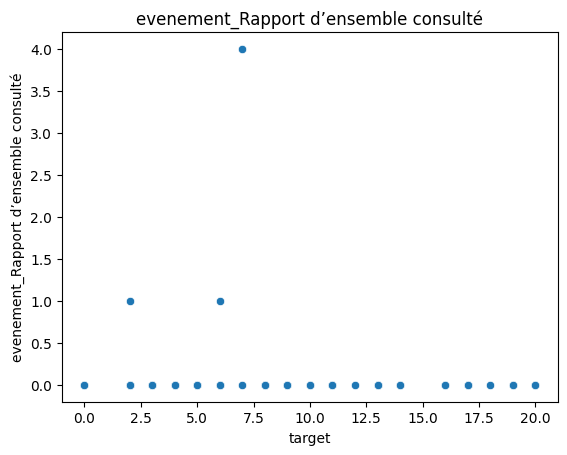

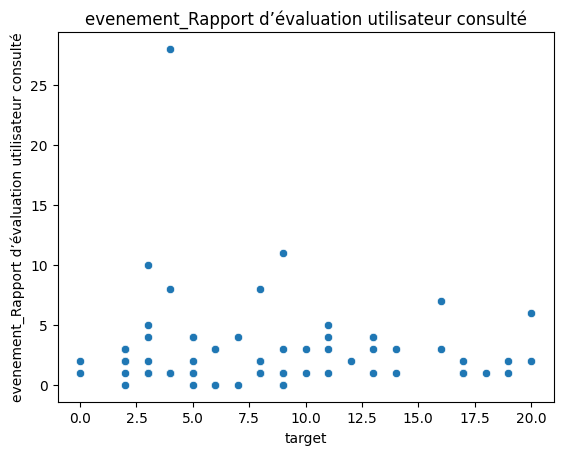

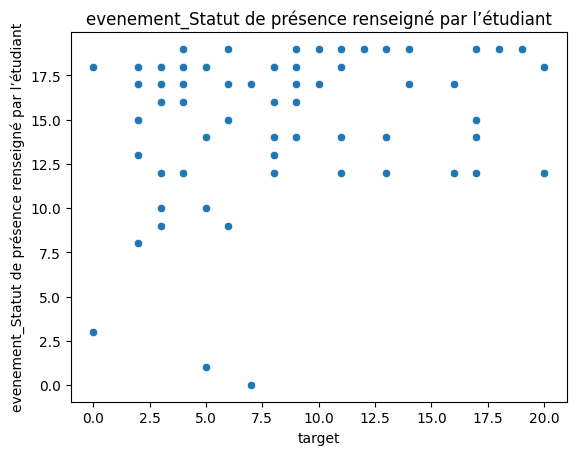

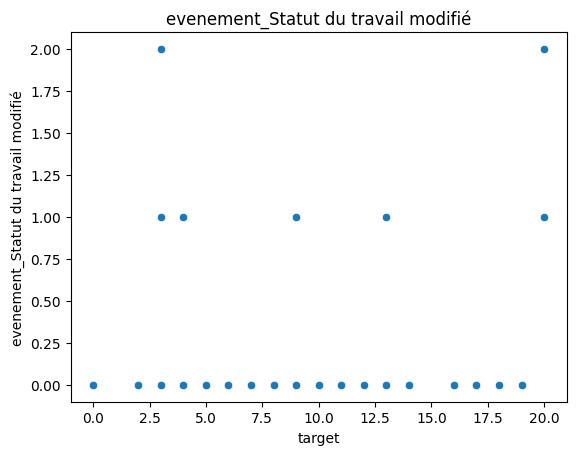

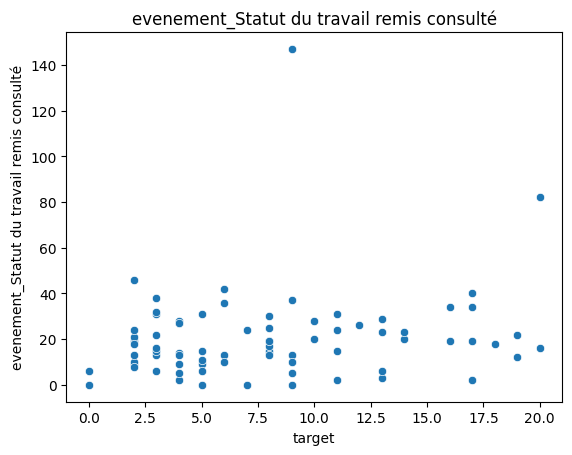

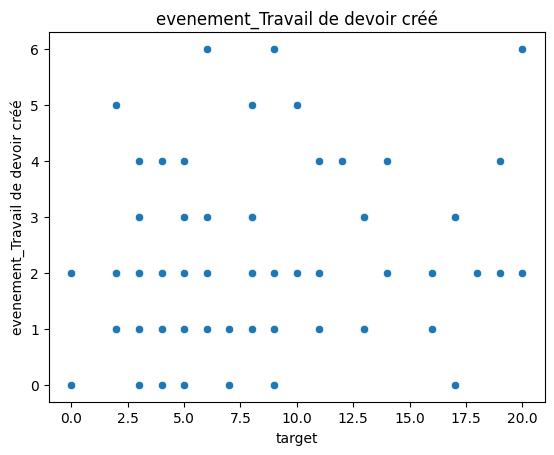

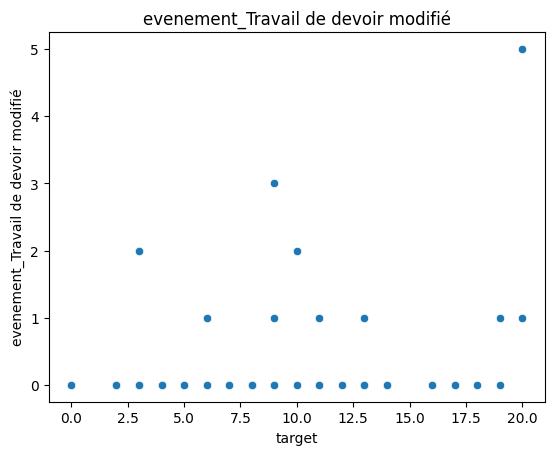

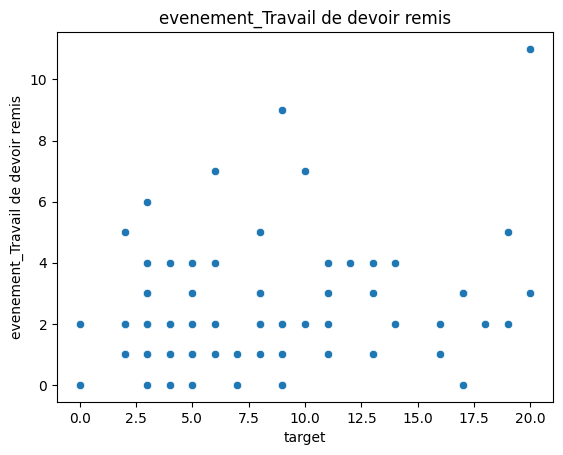

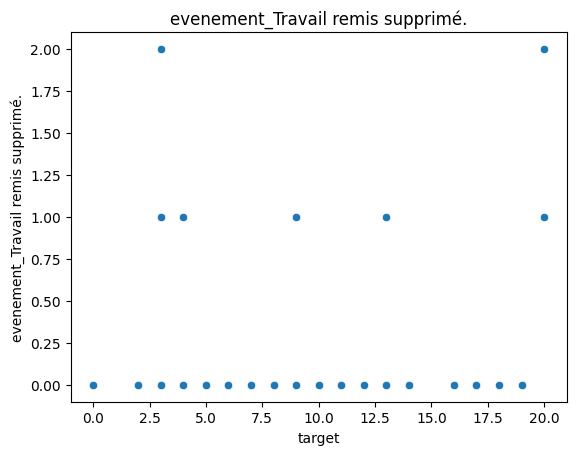

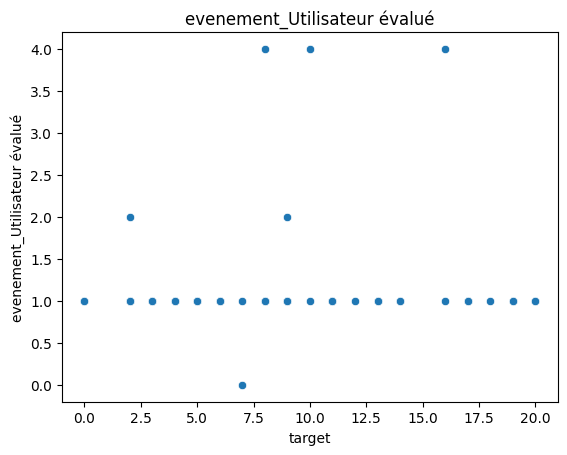

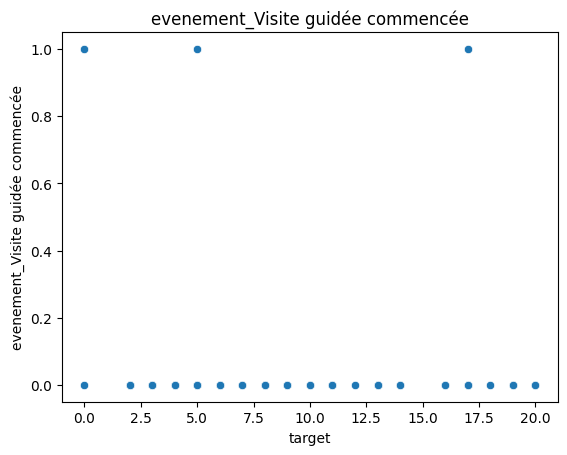

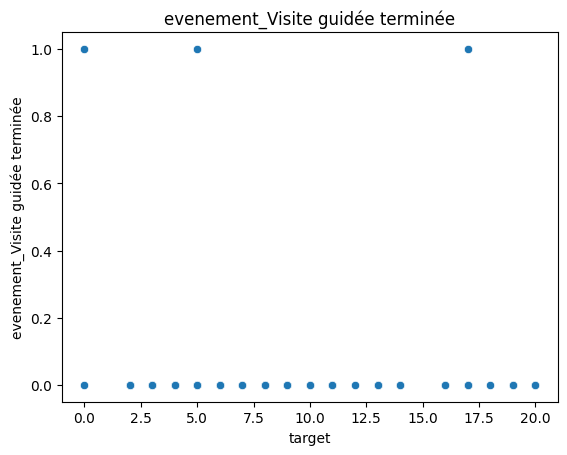

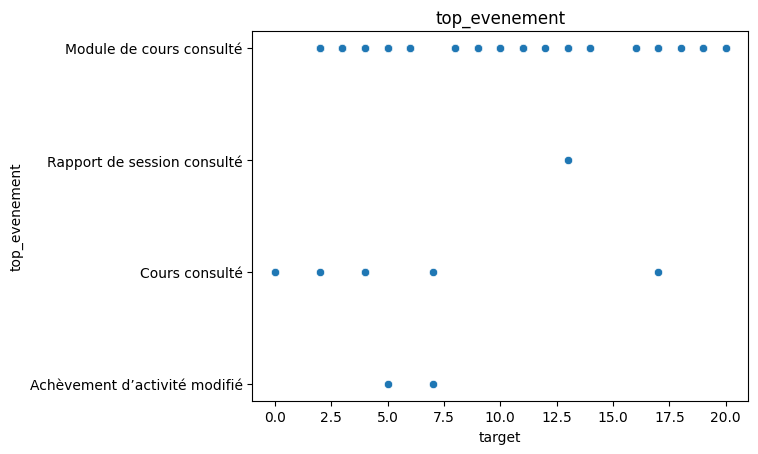

In [23]:
for col in df:
    df['target'] = notes_filtered['note']
    plt.figure()
    sns.scatterplot(data=df, x='target', y=col)
    plt.title(col)

In [24]:
plt.close()

In [25]:
pd.set_option('display.max_rows', 70)
correlations = []
for col in df.select_dtypes('float'):
    corr_value = df[col].corr(notes_filtered['note'])
    correlations.append((col, corr_value))
for col in df.select_dtypes('int'):
    corr_value = df[col].corr(notes_filtered['note'])
    correlations.append((col, corr_value))

correlation_df = pd.DataFrame(correlations, columns=['Feature', 'Correlation'])
print(correlation_df.sort_values(by='Correlation', ascending=False))

                                              Feature  Correlation
63                                             target     1.000000
41                           evenement_Fichier déposé     0.261532
58                  evenement_Travail de devoir remis     0.261532
32                      composant_Remises de fichiers     0.261532
42            evenement_Formulaire de remise consulté     0.257877
57                evenement_Travail de devoir modifié     0.240113
56                   evenement_Travail de devoir créé     0.226371
17                                    contexte_Devoir     0.213950
8                                         pct_weekend     0.209173
25                                   composant_Devoir     0.205340
11                               nb_jours_avec_action     0.187539
55         evenement_Statut du travail remis consulté     0.179922
54                evenement_Statut du travail modifié     0.150516
59                  evenement_Travail remis supprimé.     0.15

In [26]:
from scipy import stats

# Groepeer de data op basis van de 'top_contexte' en verzamel de 'note' waarden per groep
grouped_data = [df[df['top_contexte'] == category]['target'] for category in df['top_contexte'].unique()]

# Voer de ANOVA test uit
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Resultaten van de ANOVA test
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreteer de p-waarde
if p_value < 0.05:
    print("Er is een significant verschil in de 'note' tussen de verschillende categorieën van 'top_contexte'.")
else:
    print("Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_contexte'.")

F-statistic: 1.303033516041939
P-value: 0.27986043689066503
Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_contexte'.


In [27]:
from scipy import stats

# Groepeer de data op basis van de 'top_contexte' en verzamel de 'note' waarden per groep
grouped_data = [df[df['top_composant'] == category]['target'] for category in df['top_composant'].unique()]

# Voer de ANOVA test uit
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Resultaten van de ANOVA test
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreteer de p-waarde
if p_value < 0.05:
    print("Er is een significant verschil in de 'note' tussen de verschillende categorieën van 'top_composant'.")
else:
    print("Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_composant'.")

F-statistic: 1.6053085678490235
P-value: 0.2076505796526846
Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_composant'.


In [28]:
from scipy import stats

# Groepeer de data op basis van de 'top_contexte' en verzamel de 'note' waarden per groep
grouped_data = [df[df['top_evenement'] == category]['target'] for category in df['top_evenement'].unique()]

# Voer de ANOVA test uit
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Resultaten van de ANOVA test
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreteer de p-waarde
if p_value < 0.05:
    print("Er is een significant verschil in de 'note' tussen de verschillende categorieën van 'top_evenement'.")
else:
    print("Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_evenement'.")

F-statistic: 1.4293956606956124
P-value: 0.24102088724887183
Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_evenement'.


In [29]:
results = []
alpha = 0.05

for col in df.select_dtypes('float'):
    corr_coefficient, p_value = stats.pearsonr(df[col], notes_filtered['note'])
    significant = "Sign" if p_value < alpha else "Non"
    results.append((col, corr_coefficient, p_value, significant))
    
for col in df.select_dtypes('int'):
    corr_coefficient, p_value = stats.pearsonr(df[col], notes_filtered['note'])
    significant = "Sign" if p_value < alpha else "Non"
    results.append((col, corr_coefficient, p_value, significant))

correlation_df = pd.DataFrame(results, columns=['Feature', 'Coefficient', 'P-value', 'Significance'])
print(correlation_df.sort_values(by='Coefficient', ascending=False))

                                              Feature  Coefficient   P-value  \
63                                             target     1.000000  0.000000   
41                           evenement_Fichier déposé     0.261532  0.020727   
58                  evenement_Travail de devoir remis     0.261532  0.020727   
32                      composant_Remises de fichiers     0.261532  0.020727   
42            evenement_Formulaire de remise consulté     0.257877  0.022641   
57                evenement_Travail de devoir modifié     0.240113  0.034220   
56                   evenement_Travail de devoir créé     0.226371  0.046270   
17                                    contexte_Devoir     0.213950  0.059987   
8                                         pct_weekend     0.209173  0.066073   
25                                   composant_Devoir     0.205340  0.071309   
11                               nb_jours_avec_action     0.187539  0.100138   
55         evenement_Statut du travail r

In [30]:
significant_corrs = correlation_df[correlation_df['Significance'] == 'Sign'][['Feature', 'Coefficient']]

In [31]:
significant_corrs

,Feature,Coefficient
32,composant_Remises de fichiers,0.261532
41,evenement_Fichier déposé,0.261532
42,evenement_Formulaire de remise consulté,0.257877
56,evenement_Travail de devoir créé,0.226371
57,evenement_Travail de devoir modifié,0.240113
58,evenement_Travail de devoir remis,0.261532
63,target,1.000000


<Axes: >

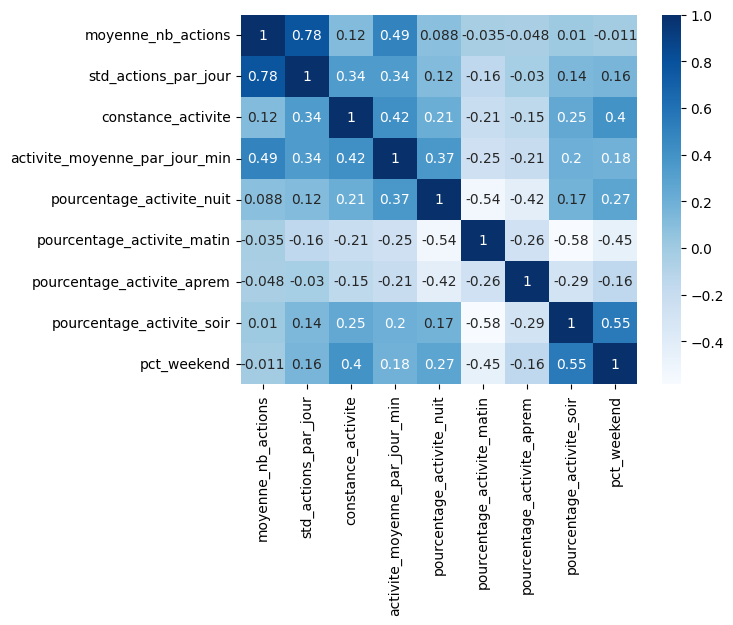

In [32]:
corr = df.select_dtypes('float').corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

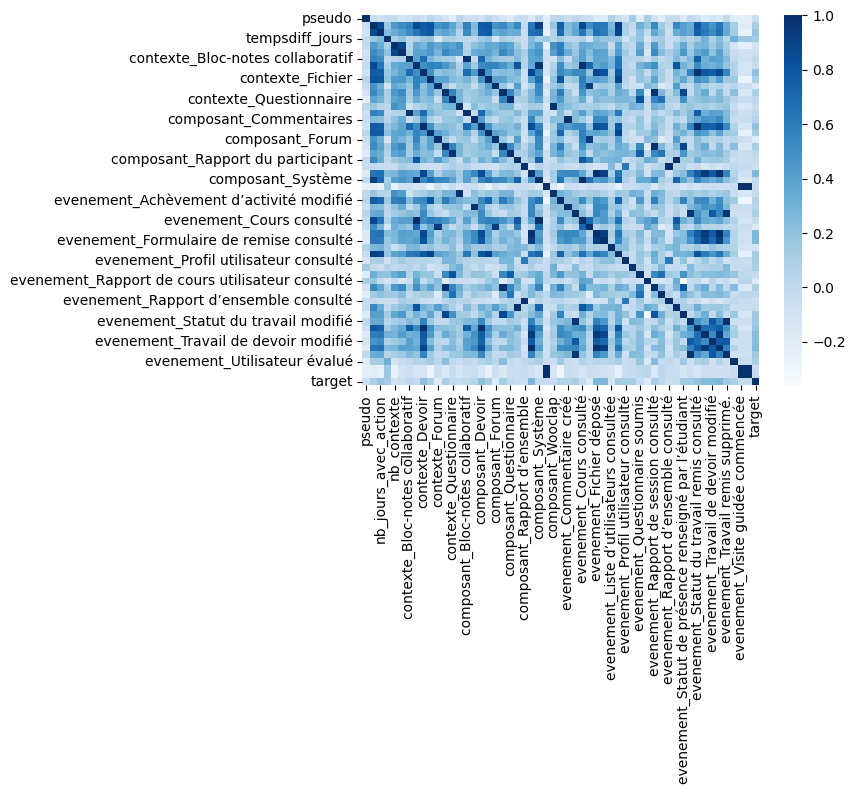

In [33]:
corr = df.select_dtypes('int').corr()
sns.heatmap(corr, cmap="Blues")

<Axes: >

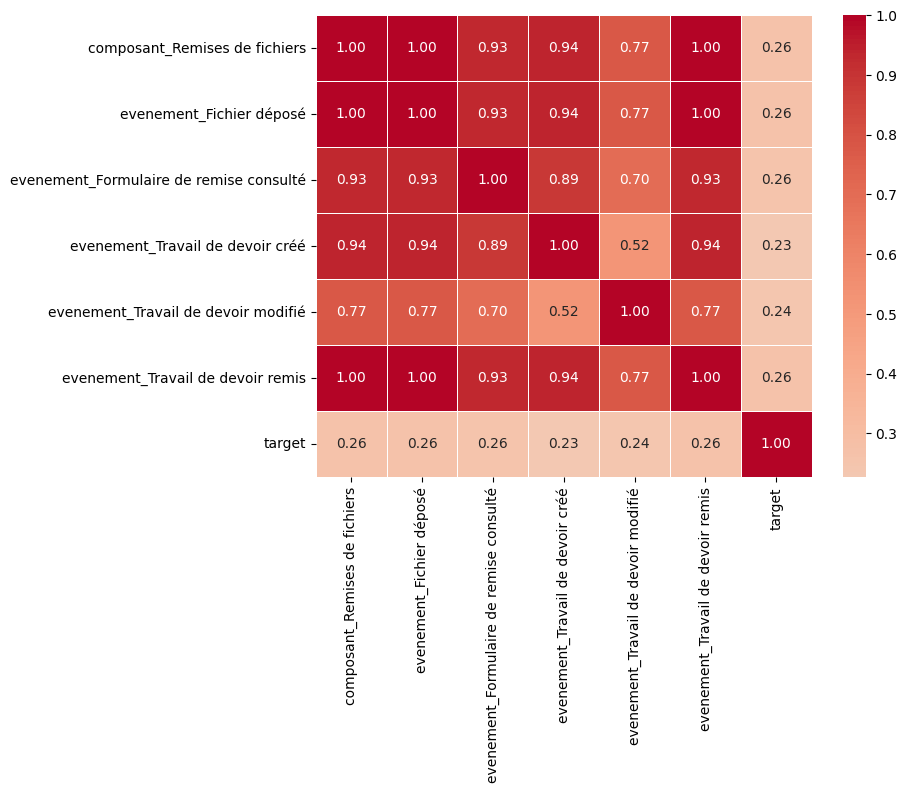

In [34]:
significant_features = significant_corrs['Feature'].tolist()
df_filtered = df[significant_features]
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, notes_filtered, test_size=0.2, random_state=1)
print("trainset :", X_train.shape, y_train.shape)
print("testset :", X_test.shape, y_test.shape)

trainset : (62, 67) (62, 2)
testset : (16, 67) (16, 2)


In [36]:
X_train.dtype()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
# select columns that have cor of less than 1
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Create an empty list to store columns to drop
columns_to_drop = []

# Iterate over the correlation matrix to find pairs with correlation of 1
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) == 1:  # If correlation is exactly 1
            colname = corr_matrix.columns[i]  # Get the column name
            columns_to_drop.append(colname)

# Drop the columns that have a correlation of 1 with another column
df = df.drop(columns=columns_to_drop)
#df_cleaned = df_cleaned.drop(columns=['target', 'cluster', 'top_evenement'])

# Show the cleaned DataFrame
print(f"Columns dropped: {columns_to_drop}")
print(df.shape)
df

Columns dropped: ['composant_Bloc-notes collaboratif', 'composant_Forum', 'composant_Présence', 'composant_Wooclap', 'evenement_Commentaire créé', 'evenement_Fichier déposé', 'evenement_Rapport d’ensemble consulté', 'evenement_Rapport d’évaluation utilisateur consulté', 'evenement_Travail de devoir remis', 'evenement_Travail de devoir remis', 'evenement_Travail remis supprimé.', 'evenement_Visite guidée commencée', 'evenement_Visite guidée terminée', 'evenement_Visite guidée terminée']
(78, 55)


,pseudo,nb_actions,moyenne_nb_actions,nb_jours_avec_action,std_actions_par_jour,tempsdiff_jours,constance_activite,activite_moyenne_par_jour_min,pourcentage_activite_nuit,pourcentage_activite_matin,...,evenement_Rapport de session consulté,evenement_Rapport des réponses individuelles consulté,evenement_Statut de présence renseigné par l’étudiant,evenement_Statut du travail modifié,evenement_Statut du travail remis consulté,evenement_Travail de devoir créé,evenement_Travail de devoir modifié,evenement_Utilisateur évalué,top_evenement,target
0,5,405,13.064516,31,10.500589,240,0.129167,193.716667,0.120988,0.229630,...,48,1,16,0,30,5,0,4,Module de cours consulté,8
1,7,377,13.000000,29,12.986256,133,0.218045,125.474138,0.000000,0.490716,...,43,2,17,0,15,2,0,1,Module de cours consulté,3
2,21,467,10.377778,45,10.888461,134,0.335821,190.212593,0.209850,0.351178,...,37,4,18,0,31,4,0,1,Module de cours consulté,11
3,29,241,12.684211,19,10.599018,93,0.204301,109.032456,0.020747,0.419087,...,41,1,14,0,13,1,0,2,Module de cours consulté,9
4,36,344,11.862069,29,11.764730,127,0.228346,159.940805,0.000000,0.401163,...,48,0,17,0,5,0,0,1,Module de cours consulté,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,869,236,10.727273,22,7.414155,169,0.130178,126.621212,0.029661,0.194915,...,37,0,15,0,2,0,0,1,Module de cours consulté,17
74,904,193,10.157895,19,8.125838,93,0.204301,132.180702,0.088083,0.227979,...,20,0,10,0,6,2,0,1,Module de cours consulté,5
75,917,301,10.033333,30,10.639819,179,0.167598,121.155556,0.006645,0.308970,...,35,1,17,0,5,1,0,1,Cours consulté,4
76,978,351,20.647059,17,19.493400,140,0.121429,200.497059,0.000000,0.484330,...,75,0,18,0,16,1,0,1,Module de cours consulté,3


In [ ]:
isinstance(df, pd.DataFrame)

True

In [ ]:
df = pd.DataFrame(df)

In [ ]:
isinstance(df, pd.DataFrame)

True

In [ ]:
df.head()

,pseudo,nb_actions,moyenne_nb_actions,nb_jours_avec_action,std_actions_par_jour,tempsdiff_jours,constance_activite,activite_moyenne_par_jour_min,pourcentage_activite_nuit,pourcentage_activite_matin,...,evenement_Rapport de session consulté,evenement_Rapport des réponses individuelles consulté,evenement_Statut de présence renseigné par l’étudiant,evenement_Statut du travail modifié,evenement_Statut du travail remis consulté,evenement_Travail de devoir créé,evenement_Travail de devoir modifié,evenement_Utilisateur évalué,top_evenement,target
0,5,405,13.064516,31,10.500589,240,0.129167,193.716667,0.120988,0.229630,...,48,1,16,0,30,5,0,4,Module de cours consulté,8
1,7,377,13.000000,29,12.986256,133,0.218045,125.474138,0.000000,0.490716,...,43,2,17,0,15,2,0,1,Module de cours consulté,3
2,21,467,10.377778,45,10.888461,134,0.335821,190.212593,0.209850,0.351178,...,37,4,18,0,31,4,0,1,Module de cours consulté,11
3,29,241,12.684211,19,10.599018,93,0.204301,109.032456,0.020747,0.419087,...,41,1,14,0,13,1,0,2,Module de cours consulté,9
4,36,344,11.862069,29,11.764730,127,0.228346,159.940805,0.000000,0.401163,...,48,0,17,0,5,0,0,1,Module de cours consulté,9


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = df.select_dtypes(include='object').columns
encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols)
df_encode = df.drop(columns=categorical_cols).join(df_encoded)

In [ ]:
df_encode.head()

,pseudo,nb_actions,moyenne_nb_actions,nb_jours_avec_action,std_actions_par_jour,tempsdiff_jours,constance_activite,activite_moyenne_par_jour_min,pourcentage_activite_nuit,pourcentage_activite_matin,...,top_contexte_Devoir,top_contexte_Fichier,top_contexte_Présence,top_composant_Fichier,top_composant_Présence,top_composant_Système,top_evenement_Achèvement d’activité modifié,top_evenement_Cours consulté,top_evenement_Module de cours consulté,top_evenement_Rapport de session consulté
0,5,405,13.064516,31,10.500589,240,0.129167,193.716667,0.120988,0.229630,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7,377,13.000000,29,12.986256,133,0.218045,125.474138,0.000000,0.490716,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,21,467,10.377778,45,10.888461,134,0.335821,190.212593,0.209850,0.351178,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,29,241,12.684211,19,10.599018,93,0.204301,109.032456,0.020747,0.419087,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,344,11.862069,29,11.764730,127,0.228346,159.940805,0.000000,0.401163,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_encode.dtypes.value_counts()

int64      42
float64    20
int32       1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = df_encode.copy()
cols_to_scale = df_scaled.columns.difference(['pseudo'])
scaler = MinMaxScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])
df_scaled.head()

,pseudo,nb_actions,moyenne_nb_actions,nb_jours_avec_action,std_actions_par_jour,tempsdiff_jours,constance_activite,activite_moyenne_par_jour_min,pourcentage_activite_nuit,pourcentage_activite_matin,...,top_contexte_Devoir,top_contexte_Fichier,top_contexte_Présence,top_composant_Fichier,top_composant_Présence,top_composant_Système,top_evenement_Achèvement d’activité modifié,top_evenement_Cours consulté,top_evenement_Module de cours consulté,top_evenement_Rapport de session consulté
0,5,0.352997,0.390453,0.393939,0.221080,0.872549,0.224064,0.485539,0.318440,0.293691,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7,0.326356,0.387086,0.363636,0.326320,0.348039,0.431867,0.293404,0.000000,0.906377,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,21,0.411989,0.250229,0.606061,0.237502,0.352941,0.707233,0.475674,0.552325,0.578925,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,29,0.196955,0.370604,0.212121,0.225247,0.151961,0.399732,0.247112,0.054606,0.738287,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,0.294957,0.327696,0.363636,0.274602,0.318627,0.455952,0.390444,0.000000,0.696224,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
df_selected = df.filter(regex="^(contexte_|evenement_|composant_)")
from sklearn.cluster import KMeans

# Voer K-means clustering uit op de geselecteerde features
model_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = model_kmeans.fit_predict(df_selected)

# Bekijk de toegevoegde clusterkolom
print(df[['Cluster'] + list(df_selected.columns)])

    Cluster  contexte_Bloc-notes collaboratif  contexte_Cours  \
0         0                                 5              84   
1         0                                 1              96   
2         1                                 2             121   
3         0                                 0              57   
4         0                                 4             104   
..      ...                               ...             ...   
73        0                                 3              55   
74        0                                 5              33   
75        0                                 7             111   
76        0                                 2              82   
77        0                                 9              99   

    contexte_Devoir  contexte_Fichier  contexte_Forum  contexte_Présence  \
0                96               146               0                 64   
1                47               157               3              

In [ ]:
pseudo_per_cluster = df.groupby('Cluster')['pseudo'].size()
print(pseudo_per_cluster)

Cluster
0    66
1    12
Name: pseudo, dtype: int64


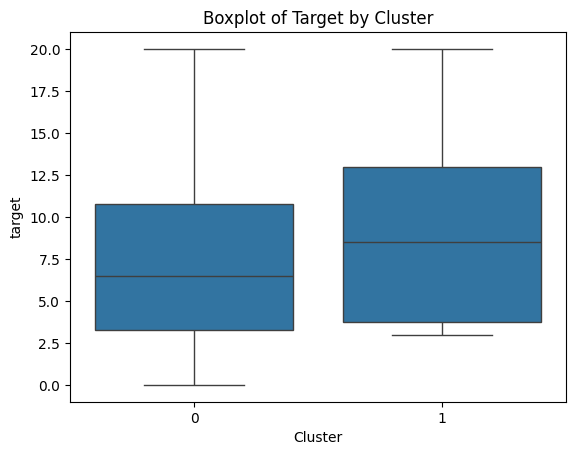

In [ ]:
import seaborn as sns
sns.boxplot(x='Cluster', y='target', data=df)

# Show the plot
plt.title('Boxplot of Target by Cluster')
plt.show()

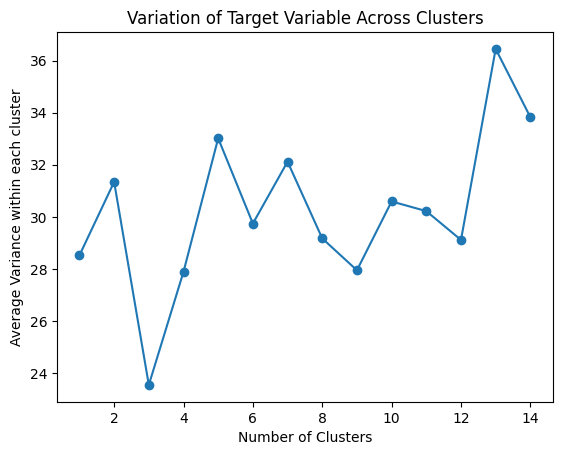

In [ ]:
# Initialize a list to store variances
target_variances = []

# Define the range of cluster numbers to test (e.g., from 1 to 10)
cluster_range = range(1, 15)

# Loop through different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(df_selected)  # Fit the model and assign clusters
    
    # Calculate the variance of 'target' within each cluster
    cluster_variance = df.groupby('Cluster')['target'].var().mean()  # Mean variance across clusters
    target_variances.append(cluster_variance)

# Plot the variance for different numbers of clusters
plt.plot(cluster_range, target_variances, marker='o')
plt.title('Variation of Target Variable Across Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Variance within each cluster')
plt.show()


In [ ]:
df_selected

,contexte_Bloc-notes collaboratif,contexte_Cours,contexte_Devoir,contexte_Fichier,contexte_Forum,contexte_Présence,contexte_Questionnaire,contexte_Wooclap,composant_Commentaires,composant_Devoir,...,evenement_Questionnaire soumis,evenement_Rapport de cours utilisateur consulté,evenement_Rapport de session consulté,evenement_Rapport des réponses individuelles consulté,evenement_Statut de présence renseigné par l’étudiant,evenement_Statut du travail modifié,evenement_Statut du travail remis consulté,evenement_Travail de devoir créé,evenement_Travail de devoir modifié,evenement_Utilisateur évalué
0,5,84,96,146,0,64,8,2,0,80,...,2,0,48,1,16,0,30,5,0,4
1,1,96,47,157,3,60,10,3,0,40,...,2,0,43,2,17,0,15,2,0,1
2,2,121,94,177,3,55,15,0,0,81,...,2,0,37,4,18,0,31,4,0,1
3,0,57,34,87,0,55,5,3,0,30,...,1,0,41,1,14,0,13,1,0,2
4,4,104,10,143,4,65,13,1,0,10,...,1,0,48,0,17,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,3,55,4,120,0,52,1,1,0,4,...,0,0,37,0,15,0,2,0,0,1
74,5,33,27,89,8,30,1,0,0,20,...,0,0,20,0,10,0,6,2,0,1
75,7,111,17,104,0,52,10,0,0,14,...,1,0,35,1,17,0,5,1,0,1
76,2,82,40,119,1,93,10,4,0,36,...,2,0,75,0,18,0,16,1,0,1


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 1. Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

pca = PCA(n_components=df_cleaned.shape[1]-1)  # Numbercolumns components equal to the number of features
pca.fit(X_scaled)

# Explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))

# Plot the explained variance for each component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue', label='Explained Variance Ratio')

# Plot the cumulative explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', color='red', label='Cumulative Explained Variance')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()

# Show the plot
plt.show()


NameError: name 'df_cleaned' is not defined

In [ ]:
principal_components = pca.fit_transform(X_scaled)

# Create a new dataframe with principal components
pca_df = pd.DataFrame(data=principal_components.iloc[:, 0:6], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

# grab eigens
eigenvectors = pca.components_  # Eigenvectors are the rows of the components_
eigenvalues = pca.explained_variance_  # Eigenvalues
# 4. Biplot (visualizing first two principal components and the eigenvectors)
plt.figure(figsize=(10, 6))

# Plot the data points in the new PCA space
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], alpha=0.7, c='blue')

# Plot the eigenvectors as arrows
for i in range(len(eigenvectors[0])):
    plt.arrow(0, 0, eigenvectors[0][i] * max(pca_df.iloc[:, 0]), eigenvectors[1][i] * max(pca_df.iloc[:, 1]),
              color='red', width=0.005, head_width=0.05)

# Add labels for the eigenvectors
for i in range(len(eigenvectors[0])):
    plt.text(eigenvectors[0][i] * max(pca_df.iloc[:, 0]), eigenvectors[1][i] * max(pca_df.iloc[:, 1]),
             list(df_filtered.columns)[i], color='red', fontsize=12)

# Title and labels
plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [ ]:
df_pca = pca_df.iloc[:,0:2]
df_pca = df_pca.assign(target = df['target'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_pca.corr(), annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")

In [ ]:
# Create a scatter plot using seaborn
sns.scatterplot(x='PC1', y='target', data=df_pca)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of x and y')

# Show the plot
plt.show()

In [ ]:
import statsmodels.api as sm
# Prepare the data
X = df_pca.drop(columns=['target'])
y = df_pca['target']



# Step 2: Add a constant column to X for the intercept
X = sm.add_constant(X)

# Step 3: Fit the model using OLS
model = sm.OLS(y, X).fit()

# Step 4: Print the summary of the regression model
print(model.summary())


In [ ]:
#try-out forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'mlxtend'

In [38]:
#from controllers.control import *
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

In [39]:
def my_linear_regression(X:pd.DataFrame, y:pd.Series, formula:str):
    """
    Permet de créer un modèle de régression linéaire
    :param df: Dataframe avec les features (X_train)
    :param df_notes: Dataframe avec le target (y_train)
    :return: Modèle régression linéaire
    """
    df_temp = X.copy()
    df_temp['target'] = y
    model = smf.ols(formula, data=df_temp).fit()
    results = model.summary()
    return model, results

def sanitize_feature_names(X):
    """Verwijdert of vervangt ongeldige tekens in feature-namen."""
    return [f"Q('{col}')" if (' ' in col or '-' in col or col[0].isdigit()) else col for col in X.columns]

In [52]:
X= pd.DataFrame(np.random.uniform(size=(100, 5)), columns=['X 1', 'X2', 'X3', 'X4', 'X5'])
y = pd.Series(np.random.uniform(size=100))


selected_features = []
remaining_features = X.columns.tolist()  # Kopie van featurelijst
adj_R2_dict = {}
prev_adj_R2 = 0
best_feature = None
best_adj_R2 = prev_adj_R2
feature = remaining_features[0]
df_temp = X[selected_features + [feature]].copy()
df_temp['target'] = y  # Voeg de target toe
# Fix feature-namen met Q()
sanitized_features = sanitize_feature_names(df_temp.drop(columns=['target']))
# Bouw de formule dynamisch
formula = f"target ~ {' + '.join(sanitized_features)}"
model = smf.ols(formula, data=df_temp).fit()
adj_R2 = model.rsquared_adj 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9176
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.340
Time:                        14:49:22   Log-Likelihood:                -20.779
No. Observations:                 100   AIC:                             45.56
Df Residuals:                      98   BIC:                             50.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4110      0.060      6.817      0.000       0.291       0.531
Q('X 1')       0.0972      0.101      0.958      0.340      -0.104       0.299
==============================================================================
Omnibus:                       58.463   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.345
Skew:                           0.104   Prob(JB):                       0.0254
Kurtosis:                       1.689   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
def forward_feature_selection(X, y):
    """
    Voert forward feature selection uit, met ondersteuning voor feature-namen met speciale tekens.

    Parameters:
    X (pd.DataFrame): DataFrame met features.
    y (pd.Series): Series met de doelvariabele.

    Returns:
    list: De geselecteerde features in volgorde van selectie.
    dict: Dictionary met de aangepaste R²-waarden.
    """
    selected_features = []
    remaining_features = X.columns.tolist()  # Kopie van featurelijst
    adj_R2_dict = {}
    prev_adj_R2 = 0

    while remaining_features:
        best_feature = None
        best_adj_R2 = prev_adj_R2

        for feature in remaining_features:
            # Maak een tijdelijke DataFrame met geselecteerde features en target
            df_temp = X[selected_features + [feature]].copy()
            df_temp['target'] = y  # Voeg de target toe

            # Fix feature-namen met Q()
            sanitized_features = sanitize_feature_names(df_temp.drop(columns=['target']))

            # Bouw de formule dynamisch
            formula = f"target ~ {' + '.join(sanitized_features)}"
            model = smf.ols(formula, data=df_temp).fit()
            adj_R2 = model.rsquared_adj

            if adj_R2 > best_adj_R2:
                best_adj_R2 = adj_R2
                best_feature = feature

        # Stop als er geen verbetering is
        if best_adj_R2 <= prev_adj_R2:
            break

        # Update de lijsten en R²-waarden
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        adj_R2_dict[', '.join(selected_features)] = best_adj_R2
        prev_adj_R2 = best_adj_R2

    return selected_features, adj_R2_dict

In [58]:
forward_feature_selection(X, y)

(['X3', 'X2'], {'X3': 0.004265143291913187, 'X3, X2': 0.007341319222915255})